**3Ïû• ‚Äì Î∂ÑÎ•ò**

_Ïù¥ ÎÖ∏Ìä∏Î∂ÅÏùÄ 3Ïû•Ïùò Î™®Îì† ÏÉòÌîå ÏΩîÎìúÏôÄ Ïó∞Ïäµ Î¨∏Ï†ú Ï†ïÎãµÏùÑ Îã¥Í≥† ÏûàÏäµÎãàÎã§._

<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/rickiepark/handson-ml3/blob/main/03_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
</table>

- ÏÑ§Ï†ï

ÌååÏù¥Ïç¨ 3.7 ÎòêÎäî Í∑∏ Ïù¥ÏÉÅÏù¥ ÌïÑÏöîÌï©ÎãàÎã§:

In [1]:
import sys

assert sys.version_info >= (3, 7)

Scikit-Learn ‚â•1.0.1Ïù¥ ÌïÑÏöîÌï©ÎãàÎã§:

In [2]:
from packaging import version
import sklearn

assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

Ïù¥Ï†Ñ Ïû•Í≥º ÎßàÏ∞¨Í∞ÄÏßÄÎ°ú Í∑∏ÎûòÌîÑÎ•º Î≥¥Í∏∞ Ï¢ãÍ≤å Í∑∏Î¶¨Í∏∞ ÏúÑÌï¥ Í∏∞Î≥∏ Ìè∞Ìä∏ ÌÅ¨Í∏∞Î•º ÏÑ§Ï†ïÌï©ÎãàÎã§:

In [3]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

`images/classification` Ìè¥ÎçîÍ∞Ä ÏóÜÎã§Î©¥ Ïù¥ Ìè¥ÎçîÎ•º ÎßåÎì§Í≥† Í≥†Ìï¥ÏÉÅÎèÑ Ïù¥ÎØ∏ÏßÄ Ï†ÄÏû•ÏùÑ ÏúÑÌï¥ ÎÖ∏Ìä∏Î∂ÅÏóêÏÑú ÏÇ¨Ïö©Ìï† `save_fig()` Ìï®ÏàòÎ•º Ï†ïÏùòÌï©ÎãàÎã§:

In [16]:
from pathlib import Path

IMAGES_PATH = Path() / "images" / "classification"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    # plt.savefig(path, format=fig_extension, dpi=resolution)

# MNIST

In [5]:
from sklearn.datasets import fetch_openml

# ÏÇ¨Ïù¥ÌÇ∑Îü∞ 1.2ÏóêÏÑú Ï∂îÍ∞ÄÎêú parser Îß§Í∞úÎ≥ÄÏàò Í∏∞Î≥∏Í∞íÏù¥ 1.4 Î≤ÑÏ†ÑÏóêÏÑú 'liac-arff'ÏóêÏÑú 'auto'Î°ú Î∞îÎÄùÎãàÎã§.
# 'auto'Ïùº Í≤ΩÏö∞ Ìù¨ÏÜåÌïú ARFF Ìè¨Îß∑Ïùº ÎïåÎäî 'liac-arff', Í∑∏Î†áÏßÄ ÏïäÏùÑ ÎïåÎäî 'pandas'Í∞Ä Îê©ÎãàÎã§.
# Ïù¥Ïóê ÎåÄÌïú Í≤ΩÍ≥†Î•º ÌîºÌïòÎ†§Î©¥ parser='auto'Î°ú ÏßÄÏ†ïÌïòÏÑ∏Ïöî.
mnist = fetch_openml('mnist_784', as_frame=False)

In [6]:
# Ï∂îÍ∞Ä ÏΩîÎìú - Ï°∞Í∏à ÎÇ¥Ïö©Ïù¥ ÍπÅÎãàÎã§
print(mnist.DESCR)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [7]:
mnist.keys()  # Ï∂îÍ∞Ä ÏΩîÎìú - Ïù¥ ÎÖ∏Ìä∏Î∂ÅÏóêÏÑúÎäî dataÏôÄ targetÎßå ÏÇ¨Ïö©Ìï©ÎãàÎã§

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [9]:
X, y = mnist.data, mnist.target
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [10]:
X.shape

(70000, 784)

In [11]:
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [12]:
y.shape

(70000,)

In [13]:
28 * 28

784

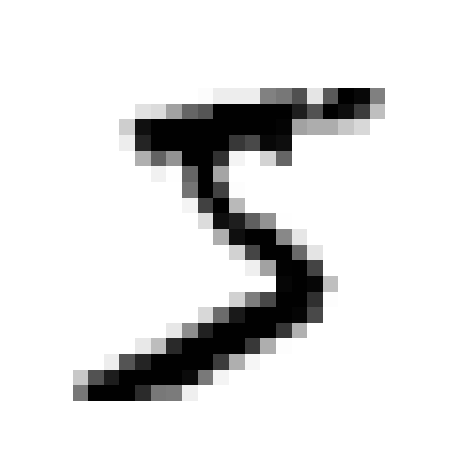

In [18]:
import matplotlib.pyplot as plt

def plot_digit(image_data):
    image = image_data.reshape(28, 28)
    plt.imshow(image, cmap="binary")
    plt.axis("off")

some_digit = X[0]
plot_digit(some_digit)
save_fig("some_digit_plot")  # Ï∂îÍ∞Ä ÏΩîÎìú
plt.show()

In [19]:
y[0]

'5'

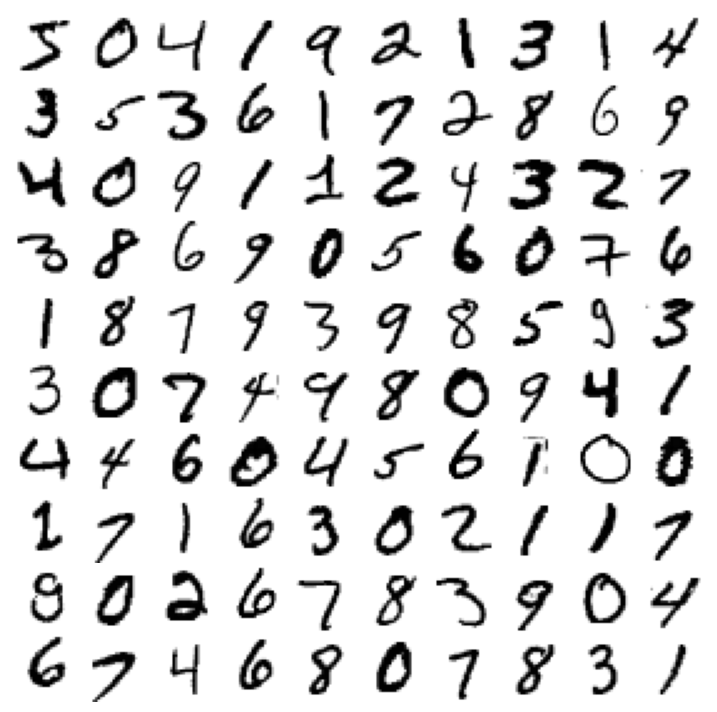

In [20]:
# Ï∂îÍ∞Ä ÏΩîÎìú ‚Äì Í∑∏Î¶º 3‚Äì2Î•º ÏÉùÏÑ±ÌïòÍ≥† Ï†ÄÏû•Ìï©ÎãàÎã§
plt.figure(figsize=(9, 9))
for idx, image_data in enumerate(X[:100]):
    plt.subplot(10, 10, idx + 1)
    plot_digit(image_data)
plt.subplots_adjust(wspace=0, hspace=0)
save_fig("more_digits_plot", tight_layout=False)
plt.show()

In [22]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

# Ïù¥ÏßÑ Î∂ÑÎ•òÍ∏∞ ÌõàÎ†®

In [23]:
y_train_5 = (y_train == '5')  # 5Îäî TrueÍ≥†, Îã§Î•∏ Ïà´ÏûêÎäî Î™®Îëê False
y_test_5 = (y_test == '5')

In [24]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [25]:
sgd_clf.predict([some_digit])

array([ True])

# ÏÑ±Îä• Ï∏°Ï†ï

## ÍµêÏ∞® Í≤ÄÏ¶ùÏùÑ ÏÇ¨Ïö©Ìïú Ï†ïÌôïÎèÑ Ï∏°Ï†ï

In [29]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

In [30]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3)  # Îç∞Ïù¥ÌÑ∞ÏÖãÏù¥ ÎØ∏Î¶¨ ÏÑûÏó¨ ÏûàÏßÄ ÏïäÎã§Î©¥
                                       # shuffle=TrueÎ•º Ï∂îÍ∞ÄÌïòÏÑ∏Ïöî.
for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_5[train_index]
    X_test_fold = X_train[test_index]
    y_test_fold = y_train_5[test_index]

    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))

0.95035
0.96035
0.9604


In [31]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier()
dummy_clf.fit(X_train, y_train_5)
print(any(dummy_clf.predict(X_train)))

False


In [32]:
cross_val_score(dummy_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.90965, 0.90965, 0.90965])

## Ïò§Ï∞® ÌñâÎ†¨

In [33]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [34]:
y_train_pred.shape

(60000,)

In [35]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_train_5, y_train_pred)
cm

array([[53892,   687],
       [ 1891,  3530]])

In [36]:
y_train_perfect_predictions = y_train_5  # ÏôÑÎ≤ΩÌïú Î∂ÑÎ•òÍ∏∞Ïùº Í≤ΩÏö∞
confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]])

## Ï†ïÎ∞ÄÎèÑÏôÄ Ïû¨ÌòÑÏú®

In [37]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_5, y_train_pred)  # == 3530 / (687 + 3530)

0.8370879772350012

In [38]:
# Ï∂îÍ∞Ä ÏΩîÎìú ‚Äì TP / (FP + TP) ÏãùÏúºÎ°ú Ï†ïÎ∞ÄÎèÑÎ•º Í≥ÑÏÇ∞Ìï©ÎãàÎã§
cm[1, 1] / (cm[0, 1] + cm[1, 1])

0.8370879772350012

In [39]:
recall_score(y_train_5, y_train_pred)  # == 3530 / (1891 + 3530)

0.6511713705958311

In [40]:
# Ï∂îÍ∞Ä ÏΩîÎìú ‚Äì TP / (FN + TP) ÏãùÏúºÎ°ú Ï†ïÎ∞ÄÎèÑÎ•º Í≥ÑÏÇ∞Ìï©ÎãàÎã§
cm[1, 1] / (cm[1, 0] + cm[1, 1])

0.6511713705958311

In [41]:
from sklearn.metrics import f1_score

f1_score(y_train_5, y_train_pred)

0.7325171197343847

In [42]:
# Ï∂îÍ∞Ä ÏΩîÎìú ‚Äì f1 Ï†êÏàòÎ•º Í≥ÑÏÇ∞Ìï©ÎãàÎã§
cm[1, 1] / (cm[1, 1] + (cm[1, 0] + cm[0, 1]) / 2)

0.7325171197343847

## Ï†ïÎ∞ÄÎèÑ/Ïû¨ÌòÑÏú® Ìä∏Î†àÏù¥ÎìúÏò§ÌîÑ

In [46]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([2164.22030239])

In [47]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)

In [48]:
y_some_digit_pred

array([ True])

In [49]:
# Ï∂îÍ∞Ä ÏΩîÎìú ‚Äì y_scores > 0Ïù¥Î©¥ predict()Î•º Ìò∏Ï∂úÌïòÎäî Í≤ÉÍ≥º Í∞ôÏùÄ Í≤∞Í≥ºÎ•º ÎÉÖÎãàÎã§
y_scores > 0

array([ True])

In [50]:
threshold = 3000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

In [51]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,
                             method="decision_function")

In [52]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

In [53]:
thresholds, precisions

(array([-146348.56726174, -142300.00705404, -137588.97581744, ...,
          38871.26391927,   42216.05562787,   49441.43765905]),
 array([0.09035   , 0.09035151, 0.09035301, ..., 1.        , 1.        ,
        1.        ]))

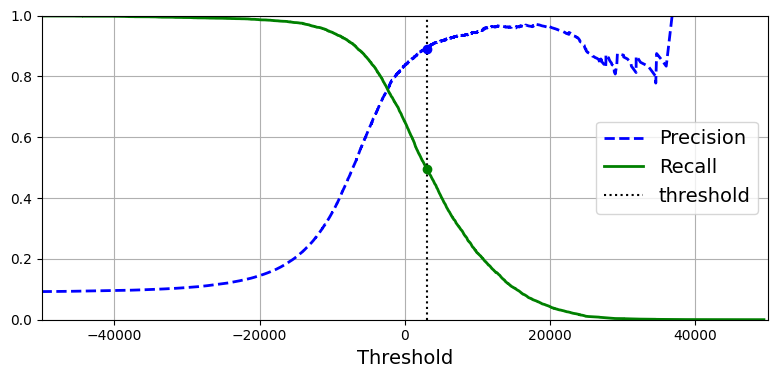

In [63]:
plt.figure(figsize=(8, 4))  # Ï∂îÍ∞Ä ÏΩîÎìú
plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
plt.vlines(threshold, 0, 1.0, "k", "dotted", label="threshold")

# Ï∂îÍ∞Ä ÏΩîÎìú ‚Äì Í∑∏Î¶º 3‚Äì5Î•º Í∑∏Î¶¨Í≥† Ï†ÄÏû•Ìï©ÎãàÎã§
idx = (thresholds >= threshold).argmax()  # Ï≤´ Î≤àÏß∏ index ‚â• threshold
plt.plot(thresholds[idx], precisions[idx], "bo")
plt.plot(thresholds[idx], recalls[idx], "go")
plt.axis([-50000, 50000, 0, 1])
plt.grid()
plt.xlabel("Threshold")
plt.legend(loc="center right")
save_fig("precision_recall_vs_threshold_plot")

plt.show()

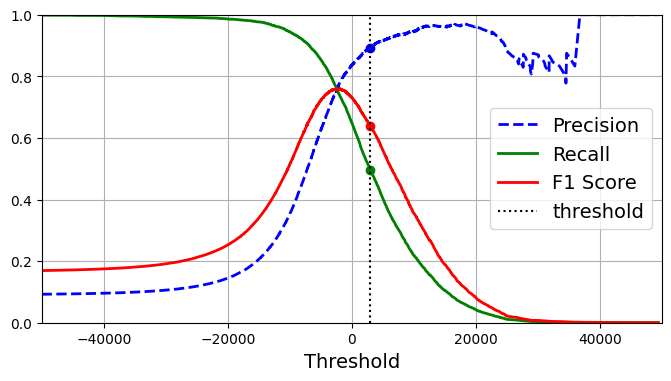

In [70]:
# F1 Ï†êÏàò Í≥ÑÏÇ∞
f1_scores = 2 * (precisions[:-1] * recalls[:-1]) / (precisions[:-1] + recalls[:-1])

plt.figure(figsize=(8, 4))

# Ï†ïÎ∞ÄÎèÑ, Ïû¨ÌòÑÏú®, F1 Ï†êÏàò Í∑∏Î¶¨Í∏∞
plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
plt.plot(thresholds, f1_scores, "r-", label="F1 Score", linewidth=2)

# ÌäπÏ†ï threshold ÏúÑÏπòÏóê Ï†ê Ï∞çÍ∏∞
idx = (thresholds >= threshold).argmax()  # Ï≤´ Î≤àÏß∏ index ‚â• threshold
plt.plot(thresholds[idx], precisions[idx], "bo")
plt.plot(thresholds[idx], recalls[idx], "go")
plt.plot(thresholds[idx], f1_scores[idx], "ro")

plt.vlines(threshold, 0, 1.0, "k", "dotted", label="threshold")

# Í∑∏ÎûòÌîÑ ÏÑ§Ï†ï
plt.axis([-50000, 50000, 0, 1])
plt.grid()
plt.xlabel("Threshold")
plt.legend(loc="center right")

# Í∑∏ÎûòÌîÑ Ï∂úÎ†•
plt.show()

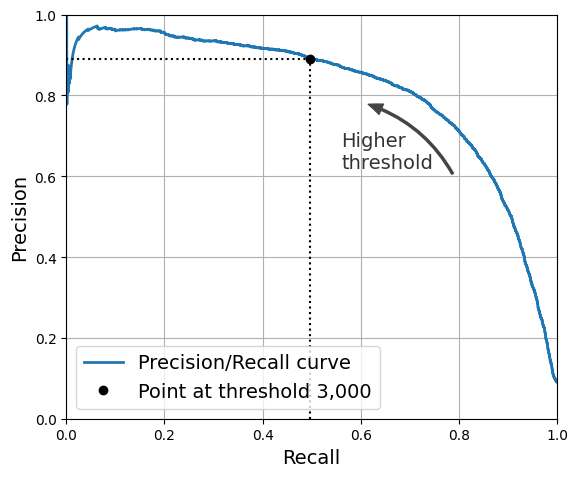

In [64]:
import matplotlib.patches as patches  # Ï∂îÍ∞Ä ÏΩîÎìú ‚Äì Íµ¨Î∂ÄÎü¨ÏßÑ ÌôîÏÇ¥ÌëúÎ•º Í∑∏Î¶¨Í∏∞ ÏúÑÌï¥ÏÑú

plt.figure(figsize=(6, 5))  # Ï∂îÍ∞Ä ÏΩîÎìú

plt.plot(recalls, precisions, linewidth=2, label="Precision/Recall curve")

# extra code ‚Äì just beautifies and saves Figure 3‚Äì6
plt.plot([recalls[idx], recalls[idx]], [0., precisions[idx]], "k:")
plt.plot([0.0, recalls[idx]], [precisions[idx], precisions[idx]], "k:")
plt.plot([recalls[idx]], [precisions[idx]], "ko",
         label="Point at threshold 3,000")
plt.gca().add_patch(patches.FancyArrowPatch(
    (0.79, 0.60), (0.61, 0.78),
    connectionstyle="arc3,rad=.2",
    arrowstyle="Simple, tail_width=1.5, head_width=8, head_length=10",
    color="#444444"))
plt.text(0.56, 0.62, "Higher\nthreshold", color="#333333")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.axis([0, 1, 0, 1])
plt.grid()
plt.legend(loc="lower left")
save_fig("precision_vs_recall_plot")

plt.show()

In [65]:
idx_for_90_precision = (precisions >= 0.90).argmax()
threshold_for_90_precision = thresholds[idx_for_90_precision]
threshold_for_90_precision

3370.0194991439557

In [66]:
idx_for_90_precision

57109

In [67]:
y_train_pred_90 = (y_scores >= threshold_for_90_precision)

In [68]:
precision_score(y_train_5, y_train_pred_90)

0.9000345901072293

In [69]:
recall_at_90_precision = recall_score(y_train_5, y_train_pred_90)
recall_at_90_precision

0.4799852425751706

## ROC Í≥°ÏÑ†

In [72]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

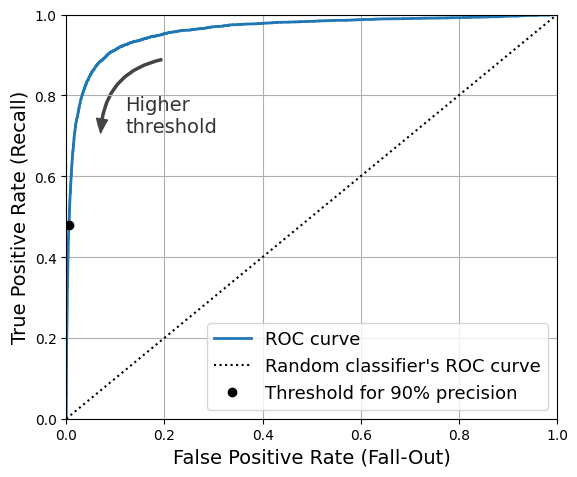

In [73]:
idx_for_threshold_at_90 = (thresholds <= threshold_for_90_precision).argmax()
tpr_90, fpr_90 = tpr[idx_for_threshold_at_90], fpr[idx_for_threshold_at_90]

plt.figure(figsize=(6, 5))  # Ï∂îÍ∞Ä ÏΩîÎìú
plt.plot(fpr, tpr, linewidth=2, label="ROC curve")
plt.plot([0, 1], [0, 1], 'k:', label="Random classifier's ROC curve")
plt.plot([fpr_90], [tpr_90], "ko", label="Threshold for 90% precision")

# Ï∂îÍ∞Ä ÏΩîÎìú ‚Äì Í∑∏Î¶º 3‚Äì7ÏùÑ Í∑∏Î¶¨Í≥† Ï†ÄÏû•Ìï©ÎãàÎã§
plt.gca().add_patch(patches.FancyArrowPatch(
    (0.20, 0.89), (0.07, 0.70),
    connectionstyle="arc3,rad=.4",
    arrowstyle="Simple, tail_width=1.5, head_width=8, head_length=10",
    color="#444444"))
plt.text(0.12, 0.71, "Higher\nthreshold", color="#333333")
plt.xlabel('False Positive Rate (Fall-Out)')
plt.ylabel('True Positive Rate (Recall)')
plt.grid()
plt.axis([0, 1, 0, 1])
plt.legend(loc="lower right", fontsize=13)
save_fig("roc_curve_plot")

plt.show()

In [74]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5, y_scores)

0.9604938554008616

**Í≤ΩÍ≥†:** Îã§Ïùå ÏÖÄÏùÄ Ïã§ÌñâÌïòÎäîÎç∞ Î™á Î∂ÑÏù¥ Í±∏Î¶¥ Ïàò ÏûàÏäµÎãàÎã§.

In [75]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)

In [76]:
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3,
                                    method="predict_proba")

In [77]:
y_probas_forest[:2]

array([[0.11, 0.89],
       [0.99, 0.01]])

Ïù¥Îäî _Ï∂îÏ†ï ÌôïÎ•†(estimated probabilities)_ÏûÖÎãàÎã§. Î™®Îç∏Ïù¥ 50%ÏóêÏÑú 60% ÏÇ¨Ïù¥Ïùò ÌôïÎ•†Î°ú ÏñëÏÑ±ÏúºÎ°ú Î∂ÑÎ•òÌïú Ïù¥ÎØ∏ÏßÄ Ï§ë Ïã§Ï†úÎ°úÎäî ÏïΩ 94%Ïùò ÏñëÏÑ± Ïù¥ÎØ∏ÏßÄÍ∞Ä ÏûàÏäµÎãàÎã§:

In [85]:
# Ï±ÖÏóêÎäî ÏóÜÏùå
idx_50_to_60 = (y_probas_forest[:, 1] > 0.50) & (y_probas_forest[:, 1] < 0.60)
print(f"{(y_train_5[idx_50_to_60]).sum() / idx_50_to_60.sum():.1%}")

94.0%


In [86]:
y_scores_forest = y_probas_forest[:, 1]
precisions_forest, recalls_forest, thresholds_forest = precision_recall_curve(
    y_train_5, y_scores_forest)

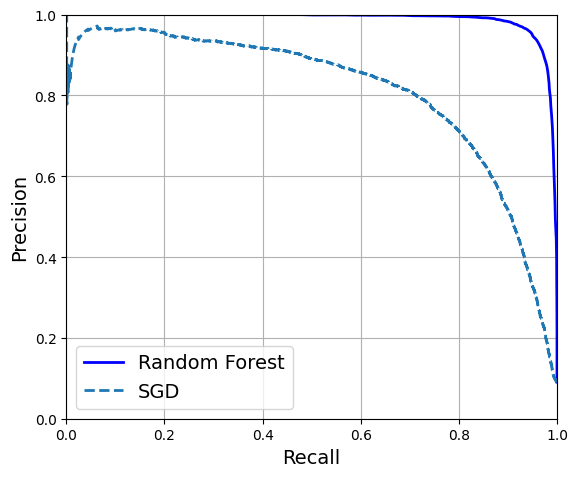

In [87]:
plt.figure(figsize=(6, 5))  # Ï∂îÍ∞Ä ÏΩîÎìú

plt.plot(recalls_forest, precisions_forest, "b-", linewidth=2,
         label="Random Forest")
plt.plot(recalls, precisions, "--", linewidth=2, label="SGD")

# Ï∂îÍ∞Ä ÏΩîÎìú ‚Äì Í∑∏Î¶º 3‚Äì8ÏùÑ Í∑∏Î¶¨Í≥† Ï†ÄÏû•Ìï©ÎãàÎã§
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.axis([0, 1, 0, 1])
plt.grid()
plt.legend(loc="lower left")
save_fig("pr_curve_comparison_plot")

plt.show()

`cross_val_predict(forest_clf, X_train, y_train_5, cv=3)`ÏùÑ Ìò∏Ï∂úÌïòÏó¨ `y_train_pred_forest`ÏùÑ Í≥ÑÏÇ∞Ìï† Ïàò ÏûàÏäµÎãàÎã§.
ÌïòÏßÄÎßå Ïù¥ÎØ∏ Ï∂îÏ†ï ÌôïÎ•†ÏùÑ Í∞ÄÏßÄÍ≥† ÏûàÍ∏∞ ÎïåÎ¨∏Ïóê Í∏∞Î≥∏ 50% ÏûÑÍ≥óÍ∞íÍ≥º ÎπÑÍµêÌïòÎ©¥ Ìõ®Ïî¨ Îπ†Î•¥Í≤å ÏòàÏ∏°ÏùÑ ÏñªÏùÑ Ïàò ÏûàÏäµÎãàÎã§:

In [88]:
y_train_pred_forest = y_probas_forest[:, 1] >= 0.5  # ÏñëÏÑ± ÌôïÎ•† ‚â• 50%
f1_score(y_train_5, y_train_pred_forest)

0.9274509803921569

In [89]:
roc_auc_score(y_train_5, y_scores_forest)

0.9983436731328145

In [90]:
precision_score(y_train_5, y_train_pred_forest)

0.9897468089558485

In [91]:
recall_score(y_train_5, y_train_pred_forest)

0.8725327430363402

- CalibratedClassifierCV

In [92]:
from sklearn.calibration import CalibratedClassifierCV

# CalibratedClassifierCVÎ•º ÏÇ¨Ïö©Ìïú ÌôïÎ•† Î≥¥Ï†ï
calibrated_forest_clf = CalibratedClassifierCV(forest_clf, method='isotonic', cv=3)
y_probas_calibrated = cross_val_predict(calibrated_forest_clf, X_train, y_train_5, cv=3,
                                        method="predict_proba")

# Î≥¥Ï†ïÎêú ÌôïÎ•†ÏóêÏÑú 50%ÏóêÏÑú 60% ÏÇ¨Ïù¥Ïùò ÌôïÎ•†Ïóê Ìï¥ÎãπÌïòÎäî ÏÉòÌîåÎì§Ïùò Ïã§Ï†ú ÏñëÏÑ± ÎπÑÏú® ÌôïÏù∏
idx_50_to_60_calibrated = (y_probas_calibrated[:, 1] > 0.50) & (y_probas_calibrated[:, 1] < 0.60)
calibrated_ratio = (y_train_5[idx_50_to_60_calibrated]).sum() / idx_50_to_60_calibrated.sum()
print(f"Calibrated: {(calibrated_ratio):.1%}")

Calibrated: 52.6%


In [93]:
y_scores_forest = y_probas_calibrated[:, 1]
precisions_forest, recalls_forest, thresholds_forest = precision_recall_curve(
    y_train_5, y_scores_forest)

In [96]:
y_train_pred_forest = y_probas_forest[:, 1] >= 0.5  # ÏñëÏÑ± ÌôïÎ•† ‚â• 50%
f1_score(y_train_5, y_train_pred_forest)

0.9274509803921569

In [97]:
roc_auc_score(y_train_5, y_scores_forest)

0.9981343500433577

In [98]:
precision_score(y_train_5, y_train_pred_forest)

0.9897468089558485

In [99]:
recall_score(y_train_5, y_train_pred_forest)

0.8725327430363402

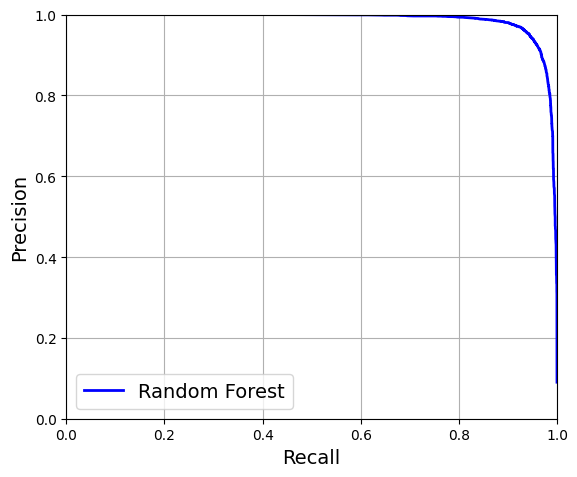

In [95]:
plt.figure(figsize=(6, 5))  # Ï∂îÍ∞Ä ÏΩîÎìú

plt.plot(recalls_forest, precisions_forest, "b-", linewidth=2,
         label="Random Forest")

# Ï∂îÍ∞Ä ÏΩîÎìú ‚Äì Í∑∏Î¶º 3‚Äì8ÏùÑ Í∑∏Î¶¨Í≥† Ï†ÄÏû•Ìï©ÎãàÎã§
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.axis([0, 1, 0, 1])
plt.grid()
plt.legend(loc="lower left")
save_fig("pr_curve_comparison_plot")

plt.show()

### calibration_curve

In [105]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.calibration import CalibratedClassifierCV

# Í∏∞Î≥∏ Î™®Îç∏
base_clf = RandomForestClassifier(random_state=42)

# CalibratedClassifierCVÎ°ú Î≥¥Ï†ï
calibrated_clf = CalibratedClassifierCV(base_clf, method='isotonic', cv=3)

y_probas_calibrated = cross_val_predict(calibrated_clf, X_train, y_train_5, cv=3,
                                        method="predict_proba")


y_proba = y_probas_calibrated[:, 1]
# precisions_forest, recalls_forest, thresholds_forest = precision_recall_curve(
#     y_train_5, y_scores_forest)

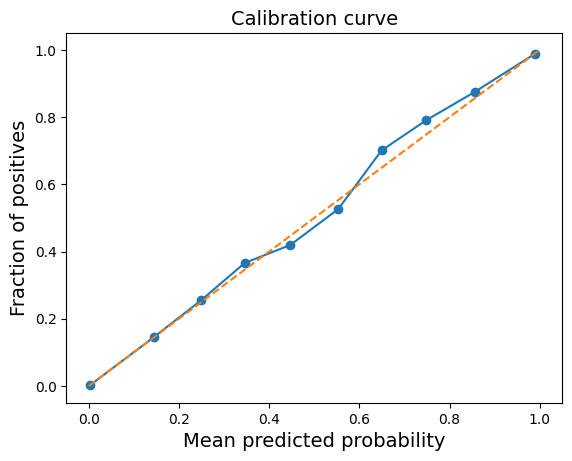

In [106]:
from sklearn.calibration import calibration_curve
import matplotlib.pyplot as plt

# ÏòàÏ∏° ÌôïÎ•†Í≥º Ïã§Ï†ú ÌÅ¥ÎûòÏä§ ÎπÑÏú® Í∞ÑÏùò Í¥ÄÍ≥Ñ Í≥ÑÏÇ∞
prob_true, prob_pred = calibration_curve(y_train_5, y_proba, n_bins=10)

# ÏãúÍ∞ÅÌôî
plt.plot(prob_pred, prob_true, marker='o')
plt.plot([0, 1], [0, 1], linestyle='--')  # ÏôÑÎ≤ΩÌïòÍ≤å Î≥¥Ï†ïÎêú Í≤ΩÏö∞Ïùò ÏÑ†
plt.xlabel('Mean predicted probability')
plt.ylabel('Fraction of positives')
plt.title('Calibration curve')
plt.show()

Brier Score before calibration: 0.0117
Brier Score after calibration: 0.0073


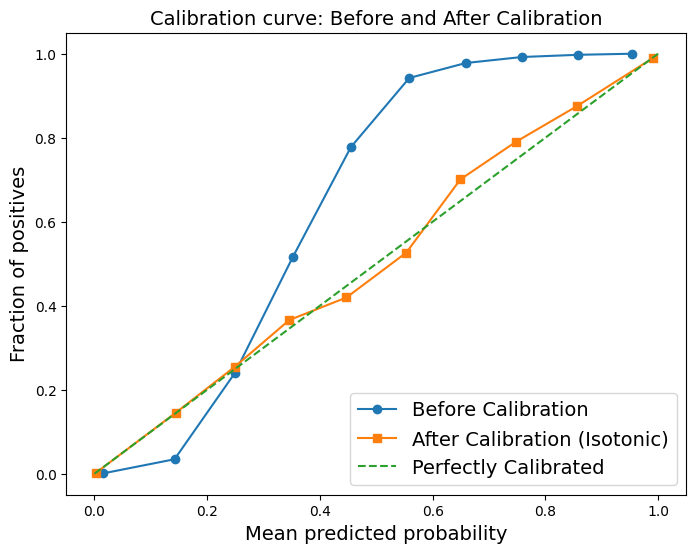

In [108]:
from sklearn.datasets import fetch_openml
from sklearn.ensemble import RandomForestClassifier
from sklearn.calibration import CalibratedClassifierCV, calibration_curve
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import brier_score_loss
import matplotlib.pyplot as plt

# 1. Îç∞Ïù¥ÌÑ∞ Î°úÎìú
mnist = fetch_openml('mnist_784', as_frame=False)
X_train, X_test, y_train, y_test = mnist.data[:60000], mnist.data[60000:], mnist.target[:60000], mnist.target[60000:]

y_train_5 = (y_train == '5')  # 5Îäî TrueÍ≥†, Îã§Î•∏ Ïà´ÏûêÎäî Î™®Îëê False
y_test_5 = (y_test == '5')

# 2. Í∏∞Î≥∏ Î™®Îç∏
base_clf = RandomForestClassifier(random_state=42)

# 3. Î≥¥Ï†ï Ï†Ñ ÌôïÎ•† ÏòàÏ∏°
y_probas_forest = cross_val_predict(base_clf, X_train, y_train_5, cv=3,
                                    method="predict_proba")
y_proba_forest = y_probas_forest[:, 1]

# 4. CalibratedClassifierCVÎ°ú Î≥¥Ï†ï ÌõÑ ÌôïÎ•† ÏòàÏ∏°
calibrated_clf = CalibratedClassifierCV(base_clf, method='isotonic', cv=3)
y_probas_calibrated = cross_val_predict(calibrated_clf, X_train, y_train_5, cv=3,
                                        method="predict_proba")
y_proba_calibrated = y_probas_calibrated[:, 1]

# 5. Brier Score Í≥ÑÏÇ∞
brier_score_forest = brier_score_loss(y_train_5, y_proba_forest)
brier_score_calibrated = brier_score_loss(y_train_5, y_proba_calibrated)

print(f"Brier Score before calibration: {brier_score_forest:.4f}")
print(f"Brier Score after calibration: {brier_score_calibrated:.4f}")

# 6. Ï∫òÎ¶¨Î∏åÎ†àÏù¥ÏÖò Í≥°ÏÑ† Í≥ÑÏÇ∞
prob_true_forest, prob_pred_forest = calibration_curve(y_train_5, y_proba_forest, n_bins=10)
prob_true_calibrated, prob_pred_calibrated = calibration_curve(y_train_5, y_proba_calibrated, n_bins=10)

# 7. ÏãúÍ∞ÅÌôî
plt.figure(figsize=(8, 6))
plt.plot(prob_pred_forest, prob_true_forest, marker='o', label='Before Calibration')
plt.plot(prob_pred_calibrated, prob_true_calibrated, marker='s', label='After Calibration (Isotonic)')
plt.plot([0, 1], [0, 1], linestyle='--', label='Perfectly Calibrated')  # ÏôÑÎ≤ΩÌïòÍ≤å Î≥¥Ï†ïÎêú Í≤ΩÏö∞Ïùò ÏÑ†
plt.xlabel('Mean predicted probability')
plt.ylabel('Fraction of positives')
plt.title('Calibration curve: Before and After Calibration')
plt.legend()
plt.show()

- ÏΩîÎìú ÏÑ§Î™Ö

1. **Îç∞Ïù¥ÌÑ∞ Î°úÎìú Î∞è Ï†ÑÏ≤òÎ¶¨**:
   - MNIST Îç∞Ïù¥ÌÑ∞ÏÖãÏóêÏÑú ÌõàÎ†®Ïö© Îç∞Ïù¥ÌÑ∞ÏôÄ ÌÖåÏä§Ìä∏Ïö© Îç∞Ïù¥ÌÑ∞Î•º Î°úÎìúÌïòÍ≥†, Ïà´Ïûê '5'Ïóê ÎåÄÌï¥ Ïù¥ÏßÑ ÌÉÄÍ≤ü(`y_train_5`, `y_test_5`)ÏùÑ ÏÉùÏÑ±Ìï©ÎãàÎã§.

2. **Í∏∞Î≥∏ Î™®Îç∏**:
   - `RandomForestClassifier`Î•º Í∏∞Î≥∏ Î™®Îç∏Î°ú ÏÑ§Ï†ïÌï©ÎãàÎã§.

3. **Î≥¥Ï†ï Ï†Ñ ÌôïÎ•† ÏòàÏ∏°**:
   - `cross_val_predict`Î•º ÏÇ¨Ïö©Ìï¥ Í∏∞Î≥∏ Î™®Îç∏Ïùò ÏòàÏ∏° ÌôïÎ•†ÏùÑ Í≥ÑÏÇ∞ÌïòÍ≥†, ÏñëÏÑ± ÌÅ¥ÎûòÏä§(Ïà´Ïûê '5')Ïóê ÎåÄÌïú ÌôïÎ•†(`y_proba_forest`)ÏùÑ Ï∂îÏ∂úÌï©ÎãàÎã§.

4. **CalibratedClassifierCVÎ•º ÏÇ¨Ïö©Ìïú Î≥¥Ï†ï ÌõÑ ÌôïÎ•† ÏòàÏ∏°**:
   - `CalibratedClassifierCV`Î•º ÏÇ¨Ïö©Ìï¥ Í∏∞Î≥∏ Î™®Îç∏Ïùò ÌôïÎ•†ÏùÑ Î≥¥Ï†ïÌïú ÌõÑ, Î≥¥Ï†ïÎêú ÌôïÎ•†(`y_proba_calibrated`)ÏùÑ Í≥ÑÏÇ∞Ìï©ÎãàÎã§.

5. **Brier Score Í≥ÑÏÇ∞**:
   - `brier_score_loss` Ìï®ÏàòÎ•º ÏÇ¨Ïö©Ìï¥ Î≥¥Ï†ï Ï†ÑÍ≥º Î≥¥Ï†ï ÌõÑÏùò Brier ScoreÎ•º Í≥ÑÏÇ∞Ìï©ÎãàÎã§. Brier ScoreÎäî ÎÇÆÏùÑÏàòÎ°ù ÌôïÎ•† ÏòàÏ∏°Ïù¥ Ïã§Ï†ú Í≤∞Í≥ºÏóê Í∞ÄÍπåÏö¥ Í≤ÉÏùÑ ÏùòÎØ∏Ìï©ÎãàÎã§.
   - Îëê Ï†êÏàòÎ•º Ï∂úÎ†•ÌïòÏó¨ Î≥¥Ï†ïÏùò Ìö®Í≥ºÎ•º ÌôïÏù∏Ìï©ÎãàÎã§.
   - Brier ScoreÎäî Ïù¥ÏßÑ Î∂ÑÎ•ò Î¨∏Ï†úÏóêÏÑú Î™®Îç∏Ïùò ÌôïÎ•† ÏòàÏ∏°Ïù¥ Ïã§Ï†ú Í≤∞Í≥ºÏôÄ ÏñºÎßàÎÇò Ïûò ÎßûÎäîÏßÄÎ•º ÌèâÍ∞ÄÌïòÎäî ÏßÄÌëúÎ°ú, ÏòàÏ∏°Îêú ÌôïÎ•†Í≥º Ïã§Ï†ú Í≤∞Í≥º Í∞ÑÏùò Ï∞®Ïù¥Î•º Ï†úÍ≥±ÌïòÏó¨ ÌèâÍ∑†ÏùÑ ÎÇ∏ Í∞íÏûÖÎãàÎã§.

        **Brier ScoreÏùò Í≥µÏãù**:
        
        $
        \text{Brier Score} = \frac{1}{N} \sum_{i=1}^{N} (f_i - o_i)^2
        $
        
        Ïó¨Í∏∞ÏÑú:
        - $ N $ÏùÄ Ï†ÑÏ≤¥ ÏÉòÌîåÏùò ÏàòÏûÖÎãàÎã§.
        - $ f_i $Îäî Î™®Îç∏Ïù¥ ÏÉòÌîå $i $Ïóê ÎåÄÌï¥ ÏòàÏ∏°Ìïú ÌôïÎ•†Í∞íÏûÖÎãàÎã§. (ÏòàÎ•º Îì§Ïñ¥, ÏÉòÌîå $ i$Í∞Ä ÏñëÏÑ± ÌÅ¥ÎûòÏä§Ïùº ÌôïÎ•†)
        - $ o_i $Îäî ÏÉòÌîå $ i$)Ïùò Ïã§Ï†ú Í≤∞Í≥ºÏûÖÎãàÎã§. Ïã§Ï†ú Í≤∞Í≥ºÎäî Ïù¥ÏßÑ Î∂ÑÎ•ò Î¨∏Ï†úÏóêÏÑú 0 ÎòêÎäî 1Ïùò Í∞íÏúºÎ°ú ÌëúÌòÑÎê©ÎãàÎã§.
          - $ o_i = 1 $ÏùÄ ÏñëÏÑ± ÌÅ¥ÎûòÏä§ (Ïòà: '5'ÎùºÍ≥† ÏòàÏ∏°Ìï¥Ïïº ÌïòÎäî Í≤ΩÏö∞)
          - $ o_i = 0 $ÏùÄ ÏùåÏÑ± ÌÅ¥ÎûòÏä§ (Ïòà: '5'Í∞Ä ÏïÑÎãå Í≤ΩÏö∞)


6. **Ï∫òÎ¶¨Î∏åÎ†àÏù¥ÏÖò Í≥°ÏÑ† Í≥ÑÏÇ∞**:
   - `calibration_curve` Ìï®ÏàòÎ•º ÏÇ¨Ïö©Ìï¥ Î≥¥Ï†ï Ï†ÑÌõÑÏùò Ï∫òÎ¶¨Î∏åÎ†àÏù¥ÏÖò Í≥°ÏÑ†ÏùÑ Í≥ÑÏÇ∞Ìï©ÎãàÎã§.

7. **ÏãúÍ∞ÅÌôî**:
   - Îëê Í≥°ÏÑ†ÏùÑ Í∑∏ÎûòÌîÑÏóê Ìï®Íªò ÏãúÍ∞ÅÌôîÌïòÏó¨ ÎπÑÍµêÌï©ÎãàÎã§. Í∑∏ÎûòÌîÑÏùò xÏ∂ïÏùÄ ÌèâÍ∑† ÏòàÏ∏° ÌôïÎ•†ÏùÑ, yÏ∂ïÏùÄ Ïã§Ï†ú ÏñëÏÑ± ÌÅ¥ÎûòÏä§Ïùò ÎπÑÏú®ÏùÑ ÎÇòÌÉÄÎÉÖÎãàÎã§.
   - Ï£ºÌô©ÏÉâ Ï†êÏÑ†ÏùÄ ÏôÑÎ≤ΩÌïòÍ≤å Î≥¥Ï†ïÎêú Î™®Îç∏Ïùò Í≤ΩÏö∞Î•º ÎÇòÌÉÄÎÇ¥Î©∞, Ïù¥ ÏÑ†Ïóê Í∞ÄÍπåÏö∏ÏàòÎ°ù Î™®Îç∏Ïùò ÏòàÏ∏° ÌôïÎ•†Ïù¥ Ïã§Ï†ú ÌÅ¥ÎûòÏä§ ÎπÑÏú®Í≥º Ïûò ÏùºÏπòÌï©ÎãàÎã§.

-  Í≤∞Í≥º Ìï¥ÏÑù

- **Brier Score**: Î≥¥Ï†ï Ï†ÑÌõÑÏùò Brier ScoreÎ•º ÎπÑÍµêÌïòÏó¨, Î≥¥Ï†ï ÌõÑ Ï†êÏàòÍ∞Ä ÎÇÆÏïÑÏ°åÎã§Î©¥ Î≥¥Ï†ïÏù¥ ÏòàÏ∏°Ïùò ÌôïÎ•† Ï†ïÌôïÏÑ±ÏùÑ Í∞úÏÑ†ÌñàÏùåÏùÑ ÏùòÎØ∏Ìï©ÎãàÎã§.
- **Ï∫òÎ¶¨Î∏åÎ†àÏù¥ÏÖò Í≥°ÏÑ†**: ÏãúÍ∞ÅÏ†ÅÏúºÎ°ú Î≥¥Ï†ï ÌõÑÏùò Í≥°ÏÑ†Ïù¥ Ï£ºÌô©ÏÉâ Ï†êÏÑ†Ïóê Îçî Í∞ÄÍπåÏõåÏ°åÎã§Î©¥, Î≥¥Ï†ïÏù¥ Î™®Îç∏Ïùò ÌôïÎ•† ÏòàÏ∏°ÏùÑ Í∞úÏÑ†ÌñàÏùåÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÏäµÎãàÎã§.

Ïù¥ ÏΩîÎìúÎ•º ÌÜµÌï¥ Î™®Îç∏Ïùò ÌôïÎ•† ÏòàÏ∏°Ïù¥ ÏñºÎßàÎÇò Ïã†Î¢∞Ìï† Ïàò ÏûàÎäîÏßÄ, Í∑∏Î¶¨Í≥† Ï∫òÎ¶¨Î∏åÎ†àÏù¥ÏÖòÏù¥ Ïù¥Î•º Ïñ¥ÎñªÍ≤å Í∞úÏÑ†ÌïòÎäîÏßÄ ÌèâÍ∞ÄÌï† Ïàò ÏûàÏäµÎãàÎã§.

# Îã§Ï§ë Î∂ÑÎ•ò

SVMÏùÄ ÎåÄÏö©Îüâ Îç∞Ïù¥ÌÑ∞ÏÖãÏóê Ïûò ÎßûÏßÄ ÏïäÍ∏∞ ÎïåÎ¨∏Ïóê Ï≤òÏùå 2,000Í∞úÏùò ÏÉòÌîåÎßå ÏÇ¨Ïö©Ìï¥ ÌõàÎ†®Ìï©ÎãàÎã§. Í∑∏Î†áÏßÄ ÏïäÏúºÎ©¥ ÏïÑÏ£º Ïò§Îûú ÏãúÍ∞ÑÏù¥ Í±∏Î¶ΩÎãàÎã§:

In [109]:
from sklearn.svm import SVC

svm_clf = SVC(random_state=42)
svm_clf.fit(X_train[:2000], y_train[:2000])  # y_train_5Í∞Ä ÏïÑÎãàÍ≥† y_trainÏùÑ ÏÇ¨Ïö©Ìï©ÎãàÎã§.

SVC(random_state=42)

In [110]:
svm_clf.predict([some_digit])

array(['5'], dtype=object)

In [112]:
some_digit_scores = svm_clf.decision_function([some_digit])
some_digit_scores.round(2)

array([[ 3.79,  0.73,  6.06,  8.3 , -0.29,  9.3 ,  1.75,  2.77,  7.21,
         4.82]])

In [113]:
class_id = some_digit_scores.argmax()
class_id

5

In [114]:
svm_clf.classes_

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object)

In [115]:
svm_clf.classes_[class_id]

'5'

`decision_function()`Ïù¥ 45Í∞ú Ï†êÏàòÎ•º Î∞òÌôòÌïòÍ≤å ÌïòÎ†§Î©¥ `decision_function_shape` Îß§Í∞úÎ≥ÄÏàòÎ•º `"ovo"`Î°ú ÏßÄÏ†ïÌï©ÎãàÎã§. Í∏∞Î≥∏Í∞íÏùÄ `"ovr"`Ïù¥ÏßÄÎßå ÌòºÎèôÌïòÏßÄ ÎßàÏÑ∏Ïöî. `SVC`Îäî Ìï≠ÏÉÅ OvOÎ°ú ÌõàÎ†®Ìï©ÎãàÎã§. Ïù¥ Îß§Í∞úÎ≥ÄÏàòÎäî 45Í∞ú Ï†êÏàòÎ•º Î∞òÌôòÌï†ÏßÄ Ïó¨Î∂ÄÏóêÎßå ÏòÅÌñ•ÏùÑ ÎØ∏Ïπ©ÎãàÎã§:

In [116]:
# Ï∂îÍ∞Ä ÏΩîÎìú ‚Äì 45Í∞ú OvO Ï†êÏàòÎ•º ÏñªÎäî Î∞©Î≤ï
svm_clf.decision_function_shape = "ovo"
some_digit_scores_ovo = svm_clf.decision_function([some_digit])
some_digit_scores_ovo.round(2)

array([[ 0.11, -0.21, -0.97,  0.51, -1.01,  0.19,  0.09, -0.31, -0.04,
        -0.45, -1.28,  0.25, -1.01, -0.13, -0.32, -0.9 , -0.36, -0.93,
         0.79, -1.  ,  0.45,  0.24, -0.24,  0.25,  1.54, -0.77,  1.11,
         1.13,  1.04,  1.2 , -1.42, -0.53, -0.45, -0.99, -0.95,  1.21,
         1.  ,  1.  ,  1.08, -0.02, -0.67, -0.14, -0.3 , -0.13,  0.25]])

In [117]:
from sklearn.multiclass import OneVsRestClassifier

ovr_clf = OneVsRestClassifier(SVC(random_state=42))
ovr_clf.fit(X_train[:2000], y_train[:2000])

OneVsRestClassifier(estimator=SVC(random_state=42))

In [118]:
ovr_clf.predict([some_digit])

array(['5'], dtype='<U1')

In [119]:
len(ovr_clf.estimators_)

10

In [120]:
ovr_clf.estimators_[0].predict([some_digit])

array([0])

In [123]:
ovr_clf.estimators_[5].predict([some_digit])

array([1])

In [124]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])

array(['3'], dtype='<U1')

In [125]:
sgd_clf.decision_function([some_digit]).round()

array([[-31893., -34420.,  -9531.,   1824., -22320.,  -1386., -26189.,
        -16148.,  -4604., -12051.]])

**Í≤ΩÍ≥†:** Îã§Ïùå ÏÖÄÏùÄ Ïã§ÌñâÌïòÎäîÎç∞ Î™á Î∂ÑÏù¥ Í±∏Î¶¥ Ïàò ÏûàÏäµÎãàÎã§.

In [128]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy", n_jobs=-1)

array([0.87365, 0.85835, 0.8689 ])

In [129]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype("float64"))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy",  n_jobs=-1)

array([0.8983, 0.891 , 0.9018])

# ÏóêÎü¨ Î∂ÑÏÑù

**Í≤ΩÍ≥†:** Îã§Ïùå ÏÖÄÏùÄ Ïã§ÌñâÌïòÎäîÎç∞ Î™á Î∂ÑÏù¥ Í±∏Î¶¥ Ïàò ÏûàÏäµÎãàÎã§.

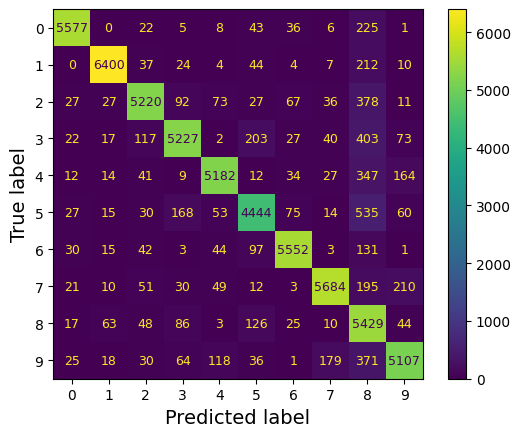

In [131]:
from sklearn.metrics import ConfusionMatrixDisplay

y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3, n_jobs=-1)
plt.rc('font', size=9)  # Ï∂îÍ∞Ä ÏΩîÎìú - Ìè∞Ìä∏ ÌÅ¨Í∏∞Î•º Ï§ÑÏûÖÎãàÎã§
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred)
plt.show()

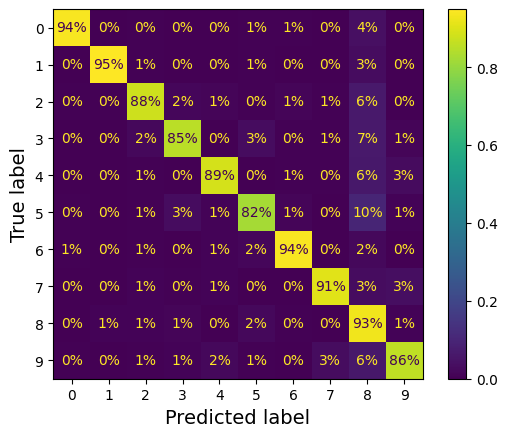

In [138]:
plt.rc('font', size=10)  # Ï∂îÍ∞Ä ÏΩîÎìú
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred,
                                        normalize="true", values_format=".0%")
plt.show()

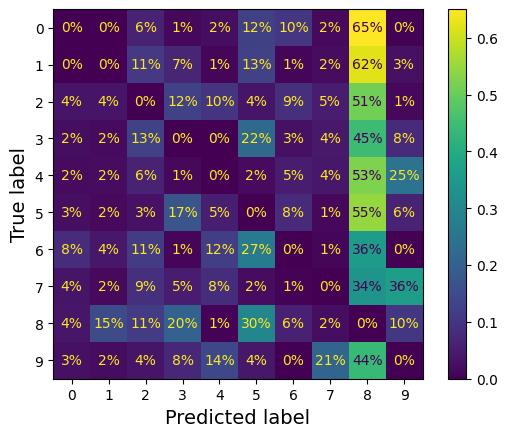

In [139]:
sample_weight = (y_train_pred != y_train)
plt.rc('font', size=10)  # Ï∂îÍ∞Ä ÏΩîÎìú
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred,
                                        sample_weight=sample_weight,
                                        normalize="true", values_format=".0%")
plt.show()

Ï±ÖÏóê ÏûàÎäî Í∑∏ÎûòÌîÑÎ•º Í∑∏Î¶ΩÎãàÎã§:

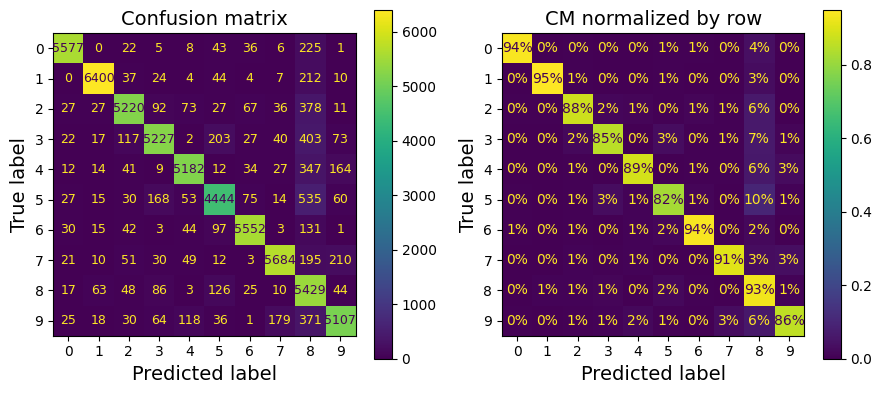

In [134]:
# Ï∂îÍ∞Ä ÏΩîÎìú ‚Äì Í∑∏Î¶º 3‚Äì9ÏùÑ ÏÉùÏÑ±ÌïòÍ≥† Ï†ÄÏû•Ìï©ÎãàÎã§
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))
plt.rc('font', size=9)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, ax=axs[0])
axs[0].set_title("Confusion matrix")
plt.rc('font', size=10)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, ax=axs[1],
                                        normalize="true", values_format=".0%")
axs[1].set_title("CM normalized by row")
save_fig("confusion_matrix_plot_1")
plt.show()

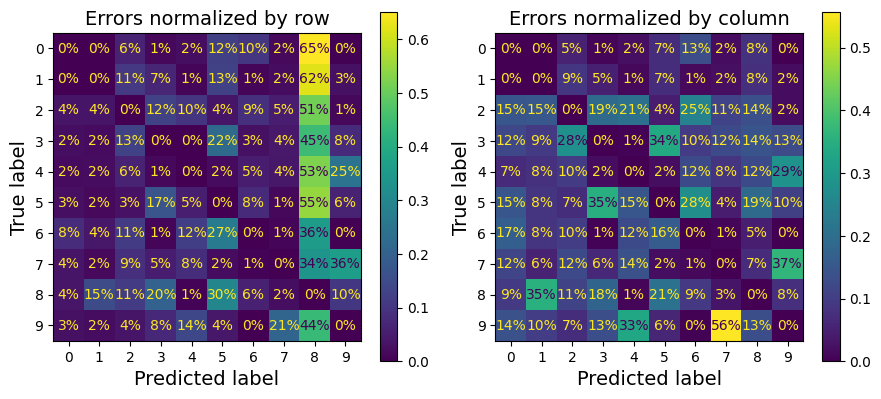

In [135]:
# Ï∂îÍ∞Ä ÏΩîÎìú ‚Äì Í∑∏Î¶º 3‚Äì10ÏùÑ ÏÉùÏÑ±ÌïòÍ≥† Ï†ÄÏû•Ìï©ÎãàÎã§
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))
plt.rc('font', size=10)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, ax=axs[0],
                                        sample_weight=sample_weight,
                                        normalize="true", values_format=".0%")
axs[0].set_title("Errors normalized by row")
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, ax=axs[1],
                                        sample_weight=sample_weight,
                                        normalize="pred", values_format=".0%")
axs[1].set_title("Errors normalized by column")
save_fig("confusion_matrix_plot_2")
plt.show()
plt.rc('font', size=14)  # Ìè∞Ìä∏ ÌÅ¨Í∏∞Î•º Îã§Ïãú ÌÇ§ÏõÅÎãàÎã§

In [140]:
# cl_a, cl_b = '3', '5'
cl_a, cl_b = '7', '9'
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]

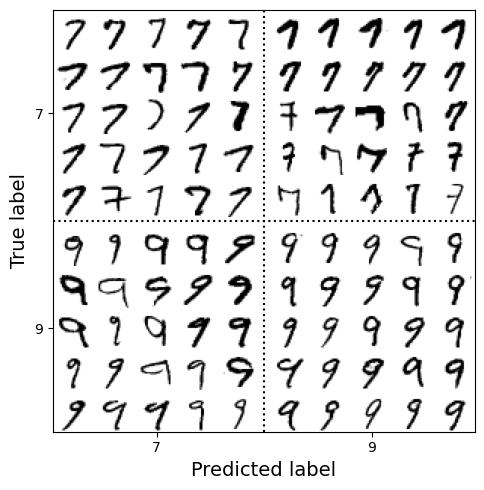

In [141]:
# Ï∂îÍ∞Ä ÏΩîÎìú ‚Äì Í∑∏Î¶º 3‚Äì11ÏùÑ ÏÉùÏÑ±ÌïòÍ≥† Ï†ÄÏû•Ìï©ÎãàÎã§
size = 5
pad = 0.2
plt.figure(figsize=(size, size))
for images, (label_col, label_row) in [(X_ba, (0, 0)), (X_bb, (1, 0)),
                                       (X_aa, (0, 1)), (X_ab, (1, 1))]:
    for idx, image_data in enumerate(images[:size*size]):
        x = idx % size + label_col * (size + pad)
        y = idx // size + label_row * (size + pad)
        plt.imshow(image_data.reshape(28, 28), cmap="binary",
                   extent=(x, x + 1, y, y + 1))
plt.xticks([size / 2, size + pad + size / 2], [str(cl_a), str(cl_b)])
plt.yticks([size / 2, size + pad + size / 2], [str(cl_b), str(cl_a)])
plt.plot([size + pad / 2, size + pad / 2], [0, 2 * size + pad], "k:")
plt.plot([0, 2 * size + pad], [size + pad / 2, size + pad / 2], "k:")
plt.axis([0, 2 * size + pad, 0, 2 * size + pad])
plt.xlabel("Predicted label")
plt.ylabel("True label")
save_fig("error_analysis_digits_plot")
plt.show()

ÎÖ∏Ìä∏: Ïù¥ÏôÄ Í∞ôÏùÄ Í∑∏ÎûòÌîÑÎ•º Í∑∏Î¶¨Îäî Î∞©Î≤ïÏù¥ Ïó¨Îü¨ Í∞ÄÏßÄÍ∞Ä ÏûàÏßÄÎßå Ï∂ï Î†àÏù¥Î∏îÏùÑ Ïò¨Î∞îÎ•¥Í≤å Ïì∞Í∏∞Í∞Ä Ï°∞Í∏à Ïñ¥Î†µÏäµÎãàÎã§:
* [nested GridSpecs](https://matplotlib.org/stable/gallery/subplots_axes_and_figures/gridspec_nested.html)
* Í∞Å Î∏îÎ°ùÏùò Î™®Îì† Ïà´ÏûêÎ•º ÌïòÎÇòÏùò Ïù¥ÎØ∏ÏßÄÎ°ú Ìï©ÏπòÍ∏∞ (Í∑∏Îã§Ïùå 2x2 ÏÑúÎ∏åÌîåÎ°Ø ÏÇ¨Ïö©ÌïòÍ∏∞). ÏòàÎ•º Îì§Î©¥:
    ```python
    X_aa[:25].reshape(5, 5, 28, 28).transpose(0, 2, 1, 3).reshape(5 * 28, 5 * 28)
    ```
* [subfigures](https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subfigures.html) (Îß∑ÌîåÎ°ØÎ¶Ω 3.4 Ïù¥ÏÉÅ)

# Îã§Ï§ë Î†àÏù¥Î∏î Î∂ÑÎ•ò

In [142]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= '7')
y_train_odd = (y_train.astype('int8') % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier()

In [143]:
knn_clf.predict([some_digit])

array([[False,  True]])

**Í≤ΩÍ≥†:** Îã§Ïùå ÏÖÄÏùÄ Ïã§ÌñâÌïòÎäîÎç∞ Î™á Î∂ÑÏù¥ Í±∏Î¶¥ Ïàò ÏûàÏäµÎãàÎã§:

In [145]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3, n_jobs=-1)
f1_score(y_multilabel, y_train_knn_pred, average="macro")

0.9764102655606048

In [146]:
# Ï∂îÍ∞Ä ÏΩîÎìú ‚Äì average="weighted"Î°ú ÏßÄÏ†ïÌñàÏùÑ Îïå ÏÑ±Îä• Ìñ•ÏÉÅÏùÄ Î¨¥ÏãúÌï† Ïàò ÏûàÎäî ÏàòÏ§ÄÏûÖÎãàÎã§.
#           Ïù¥ ÌÅ¥ÎûòÏä§Îäî Ïù¥ÎØ∏ ÍΩ§ Í∑†Ìòï Ïû°ÌòÄ ÏûàÍ∏∞ ÎïåÎ¨∏ÏûÖÎãàÎã§.
f1_score(y_multilabel, y_train_knn_pred, average="weighted")

0.9778357403921755

In [147]:
from sklearn.multioutput import ClassifierChain

chain_clf = ClassifierChain(SVC(), cv=3, random_state=42)
chain_clf.fit(X_train[:2000], y_multilabel[:2000])

ClassifierChain(base_estimator=SVC(), cv=3, random_state=42)

In [148]:
chain_clf.predict([some_digit])

array([[0., 1.]])

# Îã§Ï§ë Ï∂úÎ†• Î∂ÑÎ•ò

In [149]:
np.random.seed(42)  # ÎèôÏùºÌïòÍ≤å Ïû¨ÌòÑÎêòÍ≤å ÌïòÎ†§Í≥† ÏßÄÏ†ïÌï©ÎãàÎã§
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise
noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test

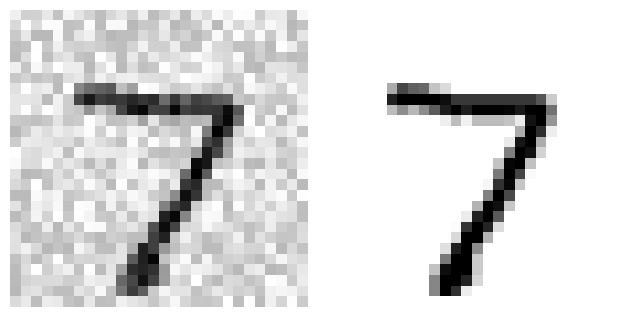

In [150]:
# Ï∂îÍ∞Ä ÏΩîÎìú ‚Äì Í∑∏Î¶º 3‚Äì12ÏùÑ ÏÉùÏÑ±ÌïòÍ≥† Ï†ÄÏû•Ìï©ÎãàÎã§
plt.subplot(121); plot_digit(X_test_mod[0])
plt.subplot(122); plot_digit(y_test_mod[0])
save_fig("noisy_digit_example_plot")
plt.show()

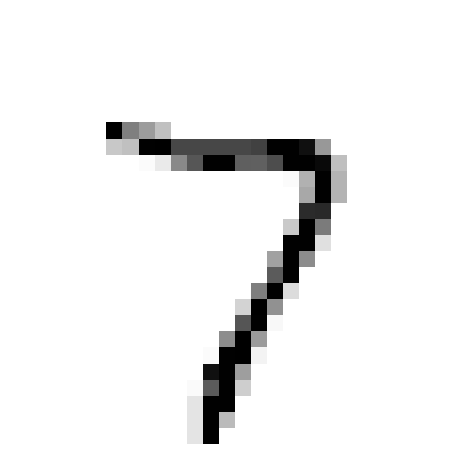

In [151]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn_clf.predict([X_test_mod[0]])
plot_digit(clean_digit)
save_fig("cleaned_digit_example_plot")  # Ï∂îÍ∞Ä ÏΩîÎìú ‚Äì Í∑∏Î¶º 3‚Äì13ÏùÑ Ï†ÄÏû•Ìï©ÎãàÎã§
plt.show()

# Ïó∞ÏäµÎ¨∏Ï†ú Ìï¥Îãµ

## 1. 97% Ï†ïÌôïÎèÑÏùò MNIST Î∂ÑÎ•òÍ∏∞

Î¨∏Ï†ú: _MNIST Îç∞Ïù¥ÌÑ∞ÏÖãÏúºÎ°ú Î∂ÑÎ•òÍ∏∞Î•º ÎßåÎì§Ïñ¥ ÌÖåÏä§Ìä∏ ÏÑ∏Ìä∏ÏóêÏÑú 97% Ï†ïÌôïÎèÑÎ•º Îã¨ÏÑ±Ìï¥Î≥¥ÏÑ∏Ïöî. ÌûåÌä∏: `KNeighborsClassifier`Í∞Ä Ïù¥ ÏûëÏóÖÏóê ÏïÑÏ£º Ïûò ÎßûÏäµÎãàÎã§. Ï¢ãÏùÄ ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ Í∞íÎßå Ï∞æÏúºÎ©¥ Îê©ÎãàÎã§(`weights`ÏôÄ `n_neighbors` ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞Î°ú Í∑∏Î¶¨Îìú ÌÉêÏÉâÏùÑ ÏãúÎèÑÌï¥Î≥¥ÏÑ∏Ïöî)._

K-ÏµúÍ∑ºÏ†ë Ïù¥ÏõÉ Î∂ÑÎ•òÍ∏∞Î•º ÏÇ¨Ïö©Ìï¥ ÌÖåÏä§Ìä∏ ÏÑ∏Ìä∏ÏóêÏÑú ÏÑ±Îä•ÏùÑ Ï∏°Ï†ïÌï¥ Î≥¥Ï£†. Ïù¥ Î™®Îç∏ÏùÑ Í∏∞Ï§Ä Î™®Îç∏Î°ú ÏÇºÏäµÎãàÎã§:

In [152]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)
baseline_accuracy = knn_clf.score(X_test, y_test)
baseline_accuracy

0.9688

ÌõåÎ•≠Ìï©ÎãàÎã§! Í∏∞Î≥∏ ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞Î•º ÏÇ¨Ïö©ÌïòÎäî KNN Î∂ÑÎ•òÍ∏∞Îäî Ïö∞Î¶¨ Î™©ÌëúÏóê Ïù¥ÎØ∏ Îß§Ïö∞ Í∑ºÏ†ëÌï©ÎãàÎã§.

ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞Î•º ÌäúÎãùÌïòÎ©¥ ÎèÑÏõÄÏù¥ Îê† Ïàò ÏûàÎäîÏßÄ ÏÇ¥Ìé¥Î¥ÖÏãúÎã§. ÌÉêÏÉâ ÏÜçÎèÑÎ•º ÎÜíÏù¥Í∏∞ ÏúÑÌï¥ Ï≤òÏùå 10,000Í∞úÏùò Ïù¥ÎØ∏ÏßÄÏóê ÎåÄÌï¥ÏÑúÎßå ÌõàÎ†®Ìï¥ Î≥¥Í≤†ÏäµÎãàÎã§:

In [153]:
from sklearn.model_selection import GridSearchCV

param_grid = [{'weights': ["uniform", "distance"], 'n_neighbors': [3, 4, 5, 6]}]

knn_clf = KNeighborsClassifier()
grid_search = GridSearchCV(knn_clf, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train[:10_000], y_train[:10_000])

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid=[{'n_neighbors': [3, 4, 5, 6],
                          'weights': ['uniform', 'distance']}])

In [154]:
grid_search.best_params_

{'n_neighbors': 4, 'weights': 'distance'}

In [155]:
grid_search.best_score_

0.9441999999999998

Ï†êÏàòÍ∞Ä Îñ®Ïñ¥Ï°åÏßÄÎßå 10,000Í∞úÏùò Ïù¥ÎØ∏ÏßÄÎ°úÎßå ÌõàÎ†®ÌñàÍ∏∞ ÎïåÎ¨∏Ïóê ÏòàÏÉÅÌñàÎçò Í≤∞Í≥ºÏûÖÎãàÎã§. Ïù¥Ï†ú ÏµúÏÉÅÏùò Î™®Îç∏ÏùÑ Í∞ÄÏ†∏ÏôÄ Ï†ÑÏ≤¥ ÌõàÎ†® ÏÑ∏Ìä∏ÏóêÏÑú Îã§Ïãú ÌõàÎ†®Ìï¥ Î≥¥Í≤†ÏäµÎãàÎã§:

In [156]:
grid_search.best_estimator_.fit(X_train, y_train)
tuned_accuracy = grid_search.score(X_test, y_test)
tuned_accuracy

0.9714

97% Ï†ïÌôïÎèÑ Î™©ÌëúÏóê ÎèÑÎã¨ÌñàÏäµÎãàÎã§! ü•≥

## 2. Îç∞Ïù¥ÌÑ∞ Ï¶ùÏãù

Î¨∏Ï†ú: _MNIST Ïù¥ÎØ∏ÏßÄÎ•º (Ïôº, Ïò§Î•∏, ÏúÑ, ÏïÑÎûò) Ïñ¥Îäê Î∞©Ìñ•ÏúºÎ°úÎì† Ìïú ÌîΩÏÖÄ Ïù¥ÎèôÏãúÌÇ¨ Ïàò ÏûàÎäî Ìï®ÏàòÎ•º ÎßåÎì§Ïñ¥Î≥¥ÏÑ∏Ïöî. `scipy.ndimage.interpolation` Î™®ÎìàÏùò `shift()` Ìï®ÏàòÎ•º ÏÇ¨Ïö©Ìï† Ïàò ÏûàÏäµÎãàÎã§. ÏòàÎ•º Îì§Ïñ¥ `shift(image, [2, 1], cval=0)`ÏùÄ ÏïÑÎûòÎ°ú 2ÌîΩÏÖÄ, Ïò§Î•∏Ï™ΩÏúºÎ°ú 1ÌîΩÏÖÄ Ïù¥ÎèôÏãúÌÇµÎãàÎã§. Í∑∏Îü∞ Îã§Ïùå ÌõàÎ†® ÏÑ∏Ìä∏Ïóê ÏûàÎäî Í∞Å Ïù¥ÎØ∏ÏßÄÏóê ÎåÄÌï¥ ÎÑ§ Í∞úÏùò Ïù¥ÎèôÎêú Î≥µÏÇ¨Î≥∏(Î∞©Ìñ•ÎßàÎã§ Ìïú Í∞úÏî©)ÏùÑ ÎßåÎì§Ïñ¥ ÌõàÎ†® ÏÑ∏Ìä∏Ïóê Ï∂îÍ∞ÄÌïòÏÑ∏Ïöî. ÎßàÏßÄÎßâÏúºÎ°ú Ïù¥ ÌôïÏû•Îêú Îç∞Ïù¥ÌÑ∞ÏÖãÏóêÏÑú ÏïûÏóêÏÑú Ï∞æÏùÄ ÏµúÏÑ†Ïùò Î™®Îç∏ÏùÑ ÌõàÎ†®ÏãúÌÇ§Í≥† ÌÖåÏä§Ìä∏ ÏÑ∏Ìä∏ÏóêÏÑú Ï†ïÌôïÎèÑÎ•º Ï∏°Ï†ïÌï¥Î≥¥ÏÑ∏Ïöî. Î™®Îç∏ ÏÑ±Îä•Ïù¥ Îçî ÎÜíÏïÑÏ°åÎäîÏßÄ ÌôïÏù∏Ìï¥Î≥¥ÏÑ∏Ïöî! Ïù∏ÏúÑÏ†ÅÏúºÎ°ú ÌõàÎ†® ÏÑ∏Ìä∏Î•º ÎäòÎ¶¨Îäî Ïù¥ Í∏∞Î≤ïÏùÑ _Îç∞Ïù¥ÌÑ∞ Ï¶ùÏãù_ ÎòêÎäî _ÌõàÎ†® ÏÑ∏Ìä∏ ÌôïÏû•_(training set expansion)Ïù¥ÎùºÍ≥† Ìï©ÎãàÎã§._

Í∞Å Ïù¥ÎØ∏ÏßÄÏùò ÏïΩÍ∞Ñ Î≥ÄÌòïÎêú Î≤ÑÏ†ÑÏùÑ Ï∂îÍ∞ÄÌïòÏó¨ MNIST Îç∞Ïù¥ÌÑ∞ÏÖãÏùÑ Ï¶ùÏãùÌï¥ Î≥¥Í≤†ÏäµÎãàÎã§.

In [157]:
from scipy.ndimage import shift

In [158]:
def shift_image(image, dx, dy):
    image = image.reshape((28, 28))
    shifted_image = shift(image, [dy, dx], cval=0, mode="constant")
    return shifted_image.reshape([-1])

ÏûëÎèôÌïòÎäîÏßÄ ÌôïÏù∏Ìï¥ Î≥¥Í≤†ÏäµÎãàÎã§:

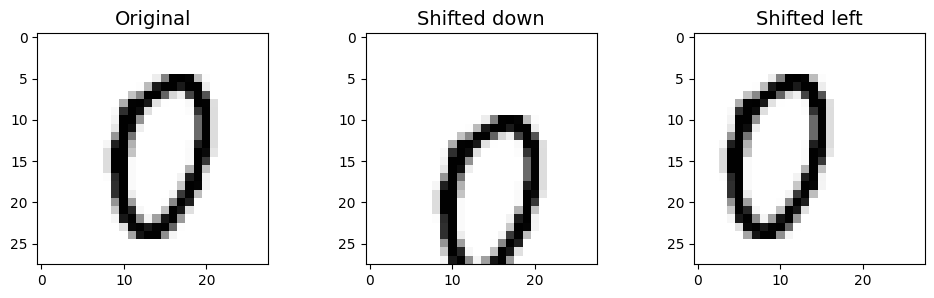

In [159]:
image = X_train[1000]  # Îç∞Î™®Ïóê ÏÇ¨Ïö©Ìï† ÏûÑÏùòÏùò Ïà´Ïûê
shifted_image_down = shift_image(image, 0, 5)
shifted_image_left = shift_image(image, -5, 0)

plt.figure(figsize=(12, 3))
plt.subplot(131)
plt.title("Original")
plt.imshow(image.reshape(28, 28),
           interpolation="nearest", cmap="Greys")
plt.subplot(132)
plt.title("Shifted down")
plt.imshow(shifted_image_down.reshape(28, 28),
           interpolation="nearest", cmap="Greys")
plt.subplot(133)
plt.title("Shifted left")
plt.imshow(shifted_image_left.reshape(28, 28),
           interpolation="nearest", cmap="Greys")
plt.show()

Ï¢ãÏïÑ Î≥¥Ïù¥ÎÑ§Ïöî! Ïù¥Ï†ú Î™®Îì† Ïù¥ÎØ∏ÏßÄÎ•º ÏôºÏ™Ω, Ïò§Î•∏Ï™Ω, ÏúÑ, ÏïÑÎûòÎ°ú 1ÌîΩÏÖÄÏî© Ïù¥ÎèôÌïòÏó¨ Ï¶ùÏãùÎêú ÌõàÎ†® ÏÑ∏Ìä∏Î•º ÎßåÎì§Ïñ¥ Î≥¥Í≤†ÏäµÎãàÎã§:

In [160]:
X_train_augmented = [image for image in X_train]
y_train_augmented = [label for label in y_train]

for dx, dy in ((-1, 0), (1, 0), (0, 1), (0, -1)):
    for image, label in zip(X_train, y_train):
        X_train_augmented.append(shift_image(image, dx, dy))
        y_train_augmented.append(label)

X_train_augmented = np.array(X_train_augmented)
y_train_augmented = np.array(y_train_augmented)

Ï¶ùÏãùÎêú ÌõàÎ†® ÏÑ∏Ìä∏Î•º ÏÑûÏñ¥ Î≥¥Í≤†ÏäµÎãàÎã§. Í∑∏Î†áÏßÄ ÏïäÏúºÎ©¥ Ïù¥ÎèôÎêú Î™®Îì† Ïù¥ÎØ∏ÏßÄÍ∞Ä Ìï®Íªò Î¨∂ÏûÖÎãàÎã§:

In [161]:
shuffle_idx = np.random.permutation(len(X_train_augmented))
X_train_augmented = X_train_augmented[shuffle_idx]
y_train_augmented = y_train_augmented[shuffle_idx]

Ïù¥Ï†ú Ïù¥Ï†Ñ Ïó∞ÏäµÎ¨∏Ï†úÏóêÏÑú Ï∞æÏùÄ ÏµúÏÉÅÏùò ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞Î•º ÏÇ¨Ïö©ÌïòÏó¨ Î™®Îç∏ÏùÑ ÌõàÎ†®Ìï¥ Î≥¥Í≤†ÏäµÎãàÎã§:

In [162]:
knn_clf = KNeighborsClassifier(**grid_search.best_params_)

In [163]:
knn_clf.fit(X_train_augmented, y_train_augmented)

KNeighborsClassifier(n_neighbors=4, weights='distance')

**Í≤ΩÍ≥†**: Îã§Ïùå ÏÖÄÏùÑ Ïã§ÌñâÌïòÎäî Îç∞ Î™á Î∂Ñ Ï†ïÎèÑ Í±∏Î¶¥ Ïàò ÏûàÏäµÎãàÎã§:

In [164]:
augmented_accuracy = knn_clf.score(X_test, y_test)
augmented_accuracy

0.9763

Îã®ÏàúÌûà Îç∞Ïù¥ÌÑ∞Î•º Î≥¥Í∞ïÌïòÎäî Í≤ÉÎßåÏúºÎ°úÎèÑ Ï†ïÌôïÎèÑÍ∞Ä 0.5% Ìñ•ÏÉÅÎêòÏóàÏäµÎãàÎã§. Í∑∏Îã§ÏßÄ Ïù∏ÏÉÅÏ†ÅÏúºÎ°ú Îì§Î¶¨ÏßÄ ÏïäÏùÑ ÏàòÎèÑ ÏûàÏßÄÎßå Ïã§Ï†úÎ°úÎäî Ïò§Î•òÏú®Ïù¥ ÌÅ¨Í≤å Í∞êÏÜåÌñàÏùåÏùÑ ÏùòÎØ∏Ìï©ÎãàÎã§:

In [165]:
error_rate_change = (1 - augmented_accuracy) / (1 - tuned_accuracy) - 1
print(f"error_rate_change = {error_rate_change:.0%}")

error_rate_change = -17%


Îç∞Ïù¥ÌÑ∞ Ï¶ùÏãù ÎçïÎ∂ÑÏóê Ïò§Î•òÏú®Ïù¥ ÏÉÅÎãπÌûà Í∞êÏÜåÌñàÏäµÎãàÎã§.

## 3. ÌÉÄÏù¥ÌÉÄÎãâ Îç∞Ïù¥ÌÑ∞ÏÖã ÎèÑÏ†ÑÌïòÍ∏∞

Î¨∏Ï†ú: _ÌÉÄÏù¥ÌÉÄÎãâ(Titanic) Îç∞Ïù¥ÌÑ∞ÏÖãÏóê ÎèÑÏ†ÑÌï¥Î≥¥ÏÑ∏Ïöî. [Ï∫êÍ∏Ä](https://www.kaggle.com/c/titanic)Ïù¥ ÏãúÏûëÌïòÍ∏∞ Ï¢ãÏäµÎãàÎã§. ÎòêÎäî https://homl.info/titanic.tgz ÏóêÏÑú Îç∞Ïù¥ÌÑ∞Î•º Îã§Ïö¥Î°úÎìúÌïòÍ≥†, 2Ïû•Ïùò Ï£ºÌÉù Îç∞Ïù¥ÌÑ∞ÏóêÏÑú ÌñàÎçò Í≤ÉÏ≤òÎüº Ïù¥ ÌååÏùºÏùò ÏïïÏ∂ïÏùÑ ÌíÄ Ïàò ÏûàÏäµÎãàÎã§. Ïù¥Î†áÍ≤å ÌïòÎ©¥ CSV ÌååÏùº train.csvÏôÄ test.csvÍ∞Ä Îëê Í∞úÍ∞Ä ÏÉùÏÑ±ÎêòÎ©∞, Ïù¥ ÌååÏùºÏùÑ `pandas.read_csv()`Î•º ÏÇ¨Ïö©Ìï¥ Î°úÎìúÌï† Ïàò ÏûàÏäµÎãàÎã§. Îã§Î•∏ Ïó¥ÏùÑ Í∏∞Î∞òÏúºÎ°ú `Survived` Ïó¥ÏùÑ ÏòàÏ∏°Ìï† Ïàò ÏûàÎäî Î∂ÑÎ•òÍ∏∞Î•º ÌõàÎ†®ÌïòÎäî Í≤ÉÏù¥ Î™©ÌëúÏûÖÎãàÎã§._

Îç∞Ïù¥ÌÑ∞Î•º Í∞ÄÏ†∏ÏôÄÏÑú Î°úÎìúÌï¥ Î≥¥Í≤†ÏäµÎãàÎã§:

In [166]:
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request

def load_titanic_data():
    tarball_path = Path("datasets/titanic.tgz")
    if not tarball_path.is_file():
        Path("datasets").mkdir(parents=True, exist_ok=True)
        url = "https://github.com/ageron/data/raw/main/titanic.tgz"
        urllib.request.urlretrieve(url, tarball_path)
        with tarfile.open(tarball_path) as titanic_tarball:
            titanic_tarball.extractall(path="datasets")
    return [pd.read_csv(Path("datasets/titanic") / filename)
            for filename in ("train.csv", "test.csv")]

In [167]:
train_data, test_data = load_titanic_data()

Ïù¥ Îç∞Ïù¥ÌÑ∞Îäî Ïù¥ÎØ∏ ÌõàÎ†® ÏÑ∏Ìä∏ÏôÄ ÌÖåÏä§Ìä∏ ÏÑ∏Ìä∏Î°ú Î∂ÑÌï†ÎêòÏñ¥ ÏûàÏäµÎãàÎã§. ÌïòÏßÄÎßå ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ÏóêÎäî Î†àÏù¥Î∏îÏù¥ Ìè¨Ìï®ÎêòÏñ¥ ÏûàÏßÄ ÏïäÏäµÎãàÎã§. Î™©ÌëúÎäî ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ÏóêÏÑú ÏµúÏÉÅÏùò Î™®Îç∏ÏùÑ ÌõàÎ†®Ìïú Îã§Ïùå, ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ÏóêÏÑú ÏòàÏ∏°ÏùÑ ÎßåÎì§Í≥† Ï∫êÍ∏ÄÏóê ÏóÖÎ°úÎìúÌïòÏó¨ ÏµúÏ¢Ö Ï†êÏàòÎ•º ÌôïÏù∏ÌïòÎäî Í≤ÉÏûÖÎãàÎã§.

ÌõàÎ†® ÏÑ∏Ìä∏Ïùò ÏÉÅÏúÑ Î™á Ï§ÑÏùÑ ÏÇ¥Ìé¥Î¥ÖÏãúÎã§:

In [168]:
train_data.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

ÌäπÏÑ±ÏùÄ Îã§ÏùåÍ≥º Í∞ôÏùÄ ÏùòÎØ∏Î•º Í∞ñÏäµÎãàÎã§:
* **PassengerId**: Í∞Å ÏäπÍ∞ùÏùò Í≥†Ïú† ÏãùÎ≥ÑÏûê
* **Survived**: ÌÉÄÍπÉÏûÖÎãàÎã§. 0ÏùÄ ÏäπÍ∞ùÏù¥ ÏÉùÏ°¥ÌïòÏßÄ Î™ªÌñàÏùåÏùÑ ÏùòÎØ∏ÌïòÍ≥†, 1ÏùÄ ÏÉùÏ°¥ÌñàÏùåÏùÑ ÏùòÎØ∏Ìï©ÎãàÎã§.
* **Pclass**: Í∞ùÏã§ Îì±Í∏â.
* **Name**, **Sex**, **Age**: ÏÑ§Î™ÖÏù¥ ÌïÑÏöî ÏóÜÎäî ÌäπÏÑ±
* **SibSp**: ÌÉÄÏù¥ÌÉÄÎãâ Ìò∏Ïóê ÌÉëÏäπÌïú ÏäπÍ∞ùÏùò ÌòïÏ†úÏûêÎß§ Î∞è Î∞∞Ïö∞Ïûê Ïàò.
* **Parch**: ÌÉÄÏù¥ÌÉÄÎãâÏóê ÌÉëÏäπÌïú ÏäπÍ∞ùÏùò ÏûêÎÖÄ Î∞è Î∂ÄÎ™® Ïàò.
* **Ticket**: Ìã∞Ïºì ID
* **Fare**: ÏßÄÎ∂àÌïú Í∞ÄÍ≤©(ÌååÏö¥Îìú)
* **Cabin**: ÏäπÍ∞ùÏùò Í∞ùÏã§ Î≤àÌò∏
* **Embarked**: ÏäπÍ∞ùÏù¥ ÌÉÄÏù¥ÌÉÄÎãâ Ìò∏Ïóê ÏäπÏÑ†Ìïú Ïû•ÏÜå

ÏäπÍ∞ùÏùò ÎÇòÏù¥, ÏÑ±Î≥Ñ, Í∞ùÏã§ Îì±Í∏â, ÌÉëÏäπ Ïû•ÏÜå Îì±Ïùò ÌäπÏÑ±ÏùÑ Í∏∞Î∞òÏúºÎ°ú ÏäπÍ∞ùÏùò ÏÉùÏ°¥ Ïó¨Î∂ÄÎ•º ÏòàÏ∏°ÌïòÎäî Í≤ÉÏù¥ Î™©ÌëúÏûÖÎãàÎã§.

Î™ÖÏãúÏ†ÅÏúºÎ°ú `PassengerId` Ïó¥ÏùÑ Ïù∏Îç±Ïä§ Ïó¥Î°ú ÏÑ§Ï†ïÌï¥ Î≥¥Í≤†ÏäµÎãàÎã§:

In [169]:
train_data = train_data.set_index("PassengerId")
test_data = test_data.set_index("PassengerId")

ÎàÑÎùΩÎêú Îç∞Ïù¥ÌÑ∞Ïùò ÏñëÏùÑ ÌôïÏù∏ÌïòÍ∏∞ ÏúÑÌï¥ ÏûêÏÑ∏Ìïú Ï†ïÎ≥¥Î•º ÌôïÏù∏Ìï¥ Î≥¥Í≤†ÏäµÎãàÎã§:

In [170]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [171]:
train_data[train_data["Sex"]=="female"]["Age"].median()

27.0

**Age**, **Cabin** Î∞è **Embarked** ÌäπÏÑ±ÏùÄ (891Í∞ú non-nullÏù¥ ÏïÑÎãàÍ∏∞ ÎïåÎ¨∏Ïóê) ÎïåÎïåÎ°ú nullÏûÖÎãàÎã§. ÌäπÌûà **Cabin**(77%Í∞Ä null)Ïù¥ Í∑∏Î†áÏäµÎãàÎã§. ÏßÄÍ∏àÏùÄ **Cabin**ÏùÄ Î¨¥ÏãúÌïòÍ≥† ÎÇòÎ®∏ÏßÄÏóê ÏßëÏ§ëÌïòÍ≤†ÏäµÎãàÎã§. **Age** ÌäπÏÑ±ÏóêÎäî ÏïΩ 19%Ïùò null Í∞íÏù¥ ÏûàÏúºÎØÄÎ°ú Ïù¥Î•º Ïñ¥ÎñªÍ≤å Ï≤òÎ¶¨Ìï†ÏßÄ Í≤∞Ï†ïÌï¥Ïïº Ìï©ÎãàÎã§. null Í∞íÏùÑ ÌèâÍ∑† Ïó∞Î†πÏúºÎ°ú ÎåÄÏ≤¥ÌïòÎäî Í≤ÉÏù¥ Ìï©Î¶¨Ï†ÅÏûÖÎãàÎã§. Îã§Î•∏ Ïó¥ÏùÑ Í∏∞Î∞òÏúºÎ°ú ÎÇòÏù¥Î•º ÏòàÏ∏°ÌïòÎ©¥ Ï¢Ä Îçî Ïä§ÎßàÌä∏Ìï† Ïàò ÏûàÏßÄÎßå(ÏòàÎ•º Îì§Ïñ¥, 1Îì±Í∏â Í∞ùÏã§Ïùò ÎÇòÏù¥ Ï§ëÏïôÍ∞íÏùÄ 37ÏÑ∏, 2Îì±Í∏âÏùÄ 29ÏÑ∏, 3Îì±Í∏âÏùÄ 24ÏÑ∏), Ïó¨Í∏∞ÏÑúÎäî Í∞ÑÎã®ÌïòÍ≤å Ï†ÑÏ≤¥ Ï§ëÏïôÍ∞íÏùÑ ÏÇ¨Ïö©ÌïòÍ∏∞Î°ú ÌïòÍ≤†ÏäµÎãàÎã§.

**Name** Î∞è **Ticket** ÌäπÏÑ±ÏùÄ Ïñ¥Îäê Ï†ïÎèÑ Í∞ÄÏπòÍ∞Ä ÏûàÏùÑ Ïàò ÏûàÏßÄÎßå Î™®Îç∏Ïù¥ ÏÇ¨Ïö©Ìï† Ïàò ÏûàÎäî Ïú†Ïö©Ìïú Ïà´ÏûêÎ°ú Î≥ÄÌôòÌïòÍ∏∞ÏóêÎäî ÏïΩÍ∞Ñ ÍπåÎã§Î°≠ÏäµÎãàÎã§. Îî∞ÎùºÏÑú ÏßÄÍ∏àÏùÄ Î¨¥ÏãúÌïòÍ≤†ÏäµÎãàÎã§.

Ïà´Ïûê ÌäπÏÑ±ÏùÑ ÏÇ¥Ìé¥Î≥¥Í≤†ÏäµÎãàÎã§:

In [172]:
train_data.describe()

Survived      Pclass         Age       SibSp       Parch        Fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699113    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526507    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.416700    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200

* Ïù¥Îü∞, **Survived**Í∞Ä 38%ÎøêÏûÖÎãàÎã§! üò≠ 40%Ïóê Ï∂©Î∂ÑÌûà Í∑ºÏ†ëÌïú ÏàòÏπòÏù¥ÎØÄÎ°ú Ï†ïÌôïÎèÑÎäî Î™®Îç∏ÏùÑ ÌèâÍ∞ÄÌïòÎäî Ìï©Î¶¨Ï†ÅÏù∏ ÏßÄÌëúÍ∞Ä Îê† Í≤ÉÏûÖÎãàÎã§.
* ÌèâÍ∑† **Fare**Îäî 32.20ÌååÏö¥ÎìúÎ°ú Í∑∏Î†áÍ≤å ÎπÑÏã∏ÏßÄ ÏïäÏùÄ Í≤É Í∞ôÏäµÎãàÎã§(ÌïòÏßÄÎßå Í∑∏ ÎãπÏãúÏóêÎäî ÎßéÏùÄ ÎèàÏù¥ÏóàÏùÑ Í≤ÉÏûÖÎãàÎã§).
* ÌèâÍ∑† **Age**Îäî 30ÏÑ∏ ÎØ∏ÎßåÏù¥ÏóàÏäµÎãàÎã§.

ÌÉÄÍπÉÏù¥ Ïã§Ï†úÎ°ú 0 ÎòêÎäî 1Ïù∏ÏßÄ ÌôïÏù∏Ìï¥ Î≥¥Í≤†ÏäµÎãàÎã§:

In [173]:
train_data["Survived"].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

Ïù¥Ï†ú Î™®Îì† Î≤îÏ£ºÌòï ÌäπÏÑ±Ïóê ÎåÄÌï¥ Í∞ÑÎã®Ìûà ÏÇ¥Ìé¥Î≥¥Í≤†ÏäµÎãàÎã§:

In [174]:
train_data["Pclass"].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [175]:
train_data["Sex"].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [176]:
train_data["Embarked"].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

ÏäπÏÑ† ÏúÑÏπò ÌäπÏÑ±ÏùÄ ÏäπÍ∞ùÏù¥ ÏäπÏÑ†Ìïú ÏúÑÏπòÎ•º ÏïåÎ†§Ï§çÎãàÎã§: C=Cherbourg, Q=Queenstown, S=Southampton.

Ïù¥Ï†ú Ïà´Ïûê ÌäπÏÑ±Ïóê ÎåÄÌïú ÌååÏù¥ÌîÑÎùºÏù∏Î∂ÄÌÑ∞ ÏãúÏûëÌïòÏó¨ Ï†ÑÏ≤òÎ¶¨ ÌååÏù¥ÌîÑÎùºÏù∏ÏùÑ Íµ¨Ï∂ïÌï¥ Î≥¥Í≤†ÏäµÎãàÎã§:

In [177]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

num_pipeline = Pipeline([
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler())
    ])

Ïù¥Ï†ú Î≤îÏ£ºÌòï ÌäπÏÑ±Ïóê ÎåÄÌïú ÌååÏù¥ÌîÑÎùºÏù∏ÏùÑ Íµ¨Ï∂ïÌï† Ïàò ÏûàÏäµÎãàÎã§:

In [178]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

In [179]:
# ÏÇ¨Ïù¥ÌÇ∑Îü∞ 1.2Î≤ÑÏ†ÑÏóêÏÑú OneHotEncoderÏùò `sparse_output` Îß§Í∞úÎ≥ÄÏàòÍ∞Ä Ï∂îÍ∞ÄÎêòÏóàÍ≥†
# `sparse` Îß§Í∞úÎ≥ÄÏàòÎäî 1.4Î≤ÑÏ†ÑÏóêÏÑú ÏÇ≠Ï†úÎêòÏóàÏäµÎãàÎã§.
cat_pipeline = Pipeline([
        ("ordinal_encoder", OrdinalEncoder()),
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("cat_encoder", OneHotEncoder(sparse_output=False)),
    ])

ÎßàÏßÄÎßâÏúºÎ°ú Ïà´Ïûê ÌååÏù¥ÌîÑÎùºÏù∏Í≥º Î≤îÏ£º ÌååÏù¥ÌîÑÎùºÏù∏ÏùÑ Í≤∞Ìï©Ìï¥ Î≥¥Í≤†ÏäµÎãàÎã§:

In [180]:
from sklearn.compose import ColumnTransformer

num_attribs = ["Age", "SibSp", "Parch", "Fare"]
cat_attribs = ["Pclass", "Sex", "Embarked"]

preprocess_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", cat_pipeline, cat_attribs),
    ])

Î©ãÏßÄÎÑ§Ïöî! Ïù¥Ï†ú ÏõêÏãú Îç∞Ïù¥ÌÑ∞Î•º Í∞ÄÏ†∏ÏôÄ ÏõêÌïòÎäî Î®∏Ïã† Îü¨Îãù Î™®Îç∏Ïóê Í≥µÍ∏â Í∞ÄÎä•Ìïú ÏàòÏπò ÏûÖÎ†• ÌäπÏÑ±ÏùÑ Ï∂úÎ†•ÌïòÎäî Î©ãÏßÑ Ï†ÑÏ≤òÎ¶¨ ÌååÏù¥ÌîÑÎùºÏù∏Ïù¥ ÏÉùÍ≤ºÏäµÎãàÎã§.

In [181]:
X_train = preprocess_pipeline.fit_transform(train_data)
X_train

array([[-0.56573582,  0.43279337, -0.47367361, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.6638609 ,  0.43279337, -0.47367361, ...,  1.        ,
         0.        ,  0.        ],
       [-0.25833664, -0.4745452 , -0.47367361, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [-0.10463705,  0.43279337,  2.00893337, ...,  0.        ,
         0.        ,  1.        ],
       [-0.25833664, -0.4745452 , -0.47367361, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.20276213, -0.4745452 , -0.47367361, ...,  0.        ,
         1.        ,  0.        ]])

Î†àÏù¥Î∏îÏùÑ Ï±ôÍ∏∞Îäî Í≤ÉÎèÑ ÏûäÏßÄ ÎßàÏÑ∏Ïöî:

In [182]:
y_train = train_data["Survived"]

Ïù¥Ï†ú Î∂ÑÎ•òÍ∏∞Î•º ÌõàÎ†®Ìï† Ï§ÄÎπÑÍ∞Ä ÎêòÏóàÏäµÎãàÎã§. Î®ºÏ†Ä `RandomForestClassifier`Î°ú ÏãúÏûëÌï¥ Î≥¥Ï£†:

In [183]:
forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)
forest_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Î™®Îç∏Ïù¥ ÌïôÏäµÎêòÏóàÏúºÎãà Ïù¥Ï†ú Ïù¥ Î™®Îç∏ÏùÑ ÏÇ¨Ïö©ÌïòÏó¨ ÌÖåÏä§Ìä∏ ÏÑ∏Ìä∏Ïóê ÎåÄÌïú ÏòàÏ∏°ÏùÑ ÏàòÌñâÌï¥ Î≥¥Í≤†ÏäµÎãàÎã§:

In [184]:
X_test = preprocess_pipeline.transform(test_data)
y_pred = forest_clf.predict(X_test)

Ïù¥Ï†ú Ïù¥Îü¨Ìïú ÏòàÏ∏°Ïù¥ Ìè¨Ìï®Îêú CSV ÌååÏùºÏùÑ (Ï∫êÍ∏ÄÏù¥ Í∏∞ÎåÄÌïòÎäî ÌòïÏãùÏóê ÎßûÏ∂îÏñ¥) ÏûëÏÑ±Ìïú Îã§Ïùå ÏóÖÎ°úÎìúÌïòÍ≥† ÏµúÏÑ†Ïù¥Í∏∞Î•º Î∞îÎûÑ Ïàò ÏûàÏäµÎãàÎã§. ÌïòÏßÄÎßå Ïû†ÍπêÎßåÏöî! Í∑∏ÎÉ• Ìù¨ÎßùÌïòÎäî Í≤ÉÎ≥¥Îã§ Îçî Ï¢ãÏùÄ Î∞©Î≤ïÏù¥ ÏûàÏäµÎãàÎã§. ÍµêÏ∞® Í≤ÄÏ¶ùÏùÑ ÏÇ¨Ïö©ÌïòÏó¨ Î™®Îç∏Ïù¥ ÏñºÎßàÎÇò Ï¢ãÏùÄÏßÄ ÏïåÏïÑÎ≥¥Îäî Í≤ÉÏùÄ Ïñ¥Îñ®ÍπåÏöî?

In [185]:
forest_scores = cross_val_score(forest_clf, X_train, y_train, cv=10)
forest_scores.mean()

0.8137578027465668

Ï¢ãÏïÑÏöî, ÎÇòÏÅòÏßÄ ÏïäÎÑ§Ïöî! Ï∫êÍ∏ÄÏóêÏÑú ÌÉÄÏù¥ÌÉÄÎãâ ÎåÄÌöåÏùò [Î¶¨ÎçîÎ≥¥Îìú](https://www.kaggle.com/c/titanic/leaderboard)Î•º Î≥¥Î©¥, Ïù¥ Ï†êÏàòÍ∞Ä ÏÉÅÏúÑ 2%Ïóê ÏÜçÌïòÎäî Í≤ÉÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÏäµÎãàÎã§, Ïö∞ÌõÑ! 100% Ï†ïÌôïÎèÑÎ•º Îã¨ÏÑ±Ìïú Ï∫êÍ∏ÄÎü¨ÎèÑ ÏûàÏóàÏßÄÎßå, ÌÉÄÏù¥ÌÉÄÎãâÏùò [Ìù¨ÏÉùÏûê Î™ÖÎã®](https://www.encyclopedia-titanica.org/titanic-victims/)ÏùÑ ÏâΩÍ≤å Ï∞æÏïÑÎ≥º Ïàò ÏûàÎäî Í≤ÉÏúºÎ°ú Î≥¥ÏïÑ Î®∏Ïã†Îü¨ÎãùÏùò ÏòÅÌñ•Ïù¥ Í±∞Ïùò ÏóÜÏóàÎçò Í≤É Í∞ôÏäµÎãàÎã§! üòÜ

`SVC`Î•º ÏãúÎèÑÌï¥ Î≥¥Ï£†:

In [186]:
from sklearn.svm import SVC

svm_clf = SVC(gamma="auto")
svm_scores = cross_val_score(svm_clf, X_train, y_train, cv=10)
svm_scores.mean()

0.8249313358302123

Ï¢ãÏïÑÏöî! Ïù¥ Î™®Îç∏Ïù¥ Îçî Ï¢ãÏïÑ Î≥¥ÏûÖÎãàÎã§.

ÌïòÏßÄÎßå 10Í∞úÏùò ÍµêÏ∞® Í≤ÄÏ¶ù Ìè¥ÎìúÏóê ÎåÄÌïú ÌèâÍ∑† Ï†ïÌôïÎèÑÎßå Î≥¥Îäî ÎåÄÏã† Í∞Å Î™®Îç∏Ïóê ÎåÄÌïú 10Í∞úÏùò Î™®Îì† Ï†êÏàòÎ•º ÌïòÏúÑ Î∞è ÏÉÅÏúÑ ÏÇ¨Î∂ÑÏúÑÏàòÎ•º Í∞ïÏ°∞ÌïòÎäî Î∞ïÏä§ ÌîåÎ°ØÍ≥º Ï†êÏàòÏùò Î≤îÏúÑÎ•º Î≥¥Ïó¨Ï£ºÎäî 'ÏàòÏóº'ÏùÑ Ìï®Íªò Í∑∏Î†§ Î≥¥Í≤†ÏäµÎãàÎã§(Ïù¥ ÏãúÍ∞ÅÌôîÎ•º Ï†úÏïàÌï¥ Ï§Ä Nevin YilmazÏóêÍ≤å Í∞êÏÇ¨ÎìúÎ¶ΩÎãàÎã§). `boxplot()` Ìï®ÏàòÎäî Ïù¥ÏÉÅÏπòÏùÑ Í∞êÏßÄÌïòÎ©∞ ÏàòÏóºÏóêÎäî Ìè¨Ìï®ÌïòÏßÄ ÏïäÎäîÎã§Îäî Ï†êÏóê Ïú†ÏùòÌïòÏÑ∏Ïöî. Íµ¨Ï≤¥Ï†ÅÏúºÎ°ú, ÌïòÏúÑ ÏÇ¨Î∂ÑÏúÑÏàòÍ∞Ä $Q_1$Ïù¥Í≥† ÏÉÅÏúÑ ÏÇ¨Î∂ÑÏúÑÏàòÍ∞Ä $Q_3$Ïù∏ Í≤ΩÏö∞ ÏÇ¨Î∂ÑÏúÑÏàò Í∞Ñ Î≤îÏúÑÍ∞Ä $IQR = Q_3 - Q_1$(ÏÉÅÏûêÏùò ÎÜíÏù¥)Ïù¥Î©∞, $Q_1 - 1.5 \times IQR$Î≥¥Îã§ ÎÇÆÏùÄ Ï†êÏàòÎäî Ïù¥ÏÉÅÏπòÏù¥Í≥†, $Q3 + 1.5 \times IQR$Î≥¥Îã§ ÌÅ∞ Ï†êÏàòÎèÑ Ïù¥ÏÉÅÏπòÏóê Ìï¥ÎãπÌï©ÎãàÎã§.

/tmp/ipykernel_599469/3995193800.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([svm_scores, forest_scores], labels=("SVM", "Random Forest"))


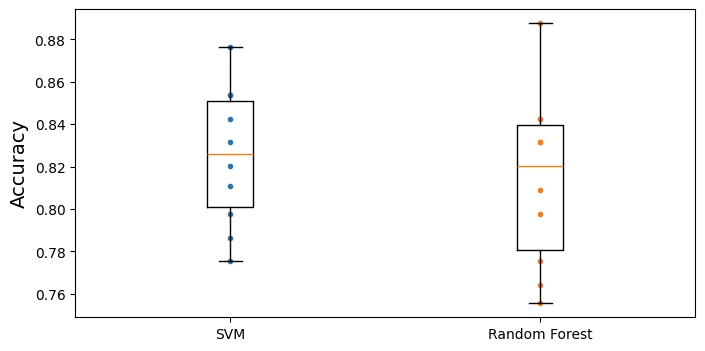

In [187]:
plt.figure(figsize=(8, 4))
plt.plot([1]*10, svm_scores, ".")
plt.plot([2]*10, forest_scores, ".")
plt.boxplot([svm_scores, forest_scores], labels=("SVM", "Random Forest"))
plt.ylabel("Accuracy")
plt.show()

ÎûúÎç§ Ìè¨Î†àÏä§Ìä∏ Î∂ÑÎ•òÍ∏∞Îäî 10Í∞ú Ìè¥Îìú Ï§ë ÌïòÎÇòÏóêÏÑú Îß§Ïö∞ ÎÜíÏùÄ Ï†êÏàòÎ•º Î∞õÏïòÏßÄÎßå Ï†ÑÎ∞òÏ†ÅÏúºÎ°ú ÌèâÍ∑† Ï†êÏàòÍ∞Ä ÎÇÆÍ≥† Îçî ÎÑêÎ¶¨ ÌçºÏ†∏ ÏûàÏñ¥ÏÑú SVM Î∂ÑÎ•òÍ∏∞Í∞Ä Îçî Ïûò ÏùºÎ∞òÌôîÌï† Í∞ÄÎä•ÏÑ±Ïù¥ ÎÜíÏùÄ Í≤ÉÏúºÎ°ú Î≥¥ÏûÖÎãàÎã§.

Ïù¥ Í≤∞Í≥ºÎ•º ÎçîÏö± Í∞úÏÑ†ÌïòÎ†§Î©¥ Îã§ÏùåÍ≥º Í∞ôÏù¥ Ìï† Ïàò ÏûàÏäµÎãàÎã§:
* ÍµêÏ∞® Í≤ÄÏ¶ù Î∞è Í∑∏Î¶¨Îìú Í≤ÄÏÉâÏùÑ ÏÇ¨Ïö©ÌïòÏó¨ Îçî ÎßéÏùÄ Î™®Îç∏ÏùÑ ÎπÑÍµêÌïòÍ≥† ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞Î•º Ï°∞Ï†ïÌïòÏÑ∏Ïöî.
* Îçî ÎßéÏùÄ ÌäπÏÑ± Í≥µÌïôÏùÑ ÏàòÌñâÌïòÏÑ∏Ïöî. ÏòàÎ•º Îì§Î©¥ Îã§ÏùåÍ≥º Í∞ôÏäµÎãàÎã§:
  * Ïà´Ïûê ÌäπÏÑ±ÏùÑ Î≤îÏ£º ÌäπÏÑ±ÏúºÎ°ú Î≥ÄÌôòÌï¥ Î≥¥ÏÑ∏Ïöî. ÏòàÎ•º Îì§Ïñ¥, Ïó∞Î†πÎåÄÎ≥ÑÎ°ú ÏÉùÏ°¥Ïú®Ïù¥ Îß§Ïö∞ Îã§Î•¥ÎØÄÎ°ú(ÏïÑÎûò Ï∞∏Ï°∞) Ïó∞Î†π Î≤ÑÌÇ∑ Ïπ¥ÌÖåÍ≥†Î¶¨Î•º ÎßåÎì§Ïñ¥ Ïó∞Î†π ÎåÄÏã† ÏÇ¨Ïö©ÌïòÎäî Í≤ÉÏù¥ ÎèÑÏõÄÏù¥ Îê† Ïàò ÏûàÏäµÎãàÎã§. ÎßàÏ∞¨Í∞ÄÏßÄÎ°ú, ÌòºÏûê Ïó¨ÌñâÌïòÎäî ÏÇ¨ÎûåÎì§Ïùò ÏÉùÏ°¥Ïú®Ïù¥ 30%Ïóê Î∂àÍ≥ºÌñàÍ∏∞ ÎïåÎ¨∏Ïóê ÌòºÏûê Ïó¨ÌñâÌïòÎäî ÏÇ¨ÎûåÎì§ÏùÑ ÏúÑÌïú ÌäπÎ≥Ñ Ïπ¥ÌÖåÍ≥†Î¶¨Î•º ÎßåÎìúÎäî Í≤ÉÏù¥ Ïú†Ïö©Ìï† Ïàò ÏûàÏäµÎãàÎã§(ÏïÑÎûò Ï∞∏Ï°∞).
  * **SibSp**ÏôÄ **Parch**Î•º Ìï©Ï≥ê Î≥¥ÏÑ∏Ïöî.
  * **Survived** ÏÜçÏÑ±Í≥º Ïûò Ïó∞Í¥ÄÎêòÎäî Ïù¥Î¶Ñ Î∂ÄÎ∂ÑÏùÑ Ï∞æÏïÑÎ≥¥ÏÑ∏Ïöî.
  * **Cabin** Ïó¥ÏùÑ ÏÇ¨Ïö©ÌïòÏÑ∏Ïöî. ÏòàÎ•º Îì§Ïñ¥ Ï≤´ Í∏ÄÏûêÎ•º Í∞ÄÏ†∏ÏôÄ Î≤îÏ£ºÌòï ÏÜçÏÑ±ÏúºÎ°ú Ï≤òÎ¶¨Ìï©ÎãàÎã§.

In [188]:
train_data["AgeBucket"] = train_data["Age"] // 15 * 15
train_data[["AgeBucket", "Survived"]].groupby(['AgeBucket']).mean()

Survived
AgeBucket          
0.0        0.576923
15.0       0.362745
30.0       0.423256
45.0       0.404494
60.0       0.240000
75.0       1.000000

In [189]:
train_data["RelativesOnboard"] = train_data["SibSp"] + train_data["Parch"]
train_data[["RelativesOnboard", "Survived"]].groupby(
    ['RelativesOnboard']).mean()

Survived
RelativesOnboard          
0                 0.303538
1                 0.552795
2                 0.578431
3                 0.724138
4                 0.200000
5                 0.136364
6                 0.333333
7                 0.000000
10                0.000000

## 4. Ïä§Ìå∏ ÌïÑÌÑ∞

Î¨∏Ï†ú: _Ïä§Ìå∏ Î∂ÑÎ•òÍ∏∞Î•º ÎßåÎì§Ïñ¥Î≥¥ÏÑ∏Ïöî(ÏïÑÏ£º ÎèÑÏ†ÑÏ†ÅÏù∏ Í≥ºÏ†úÏûÖÎãàÎã§)._

* _[ÏïÑÌååÏπò Ïä§Ìå∏Ïñ¥ÏÉàÏã†(Apache SpamAssassin) Í≥µÍ≥µ Îç∞Ïù¥ÌÑ∞ÏÖã](https://homl.info/spamassassin)ÏóêÏÑú Ïä§Ìå∏(spam)Í≥º ÌñÑ(ham)(Ïä§Ìå∏Ïù¥ ÏïÑÎãå Î©îÏùº) ÏÉòÌîåÏùÑ ÎÇ¥Î†§Î∞õÏäµÎãàÎã§._
* _Îç∞Ïù¥ÌÑ∞ÏÖãÏùò ÏïïÏ∂ïÏùÑ ÌíÄÍ≥† Îç∞Ïù¥ÌÑ∞ ÌòïÏãùÏùÑ ÏÇ¥Ìé¥Î¥ÖÎãàÎã§._
* _Îç∞Ïù¥ÌÑ∞ÏÖãÏùÑ ÌõàÎ†® ÏÑ∏Ìä∏ÏôÄ ÌÖåÏä§Ìä∏ ÏÑ∏Ìä∏Î°ú ÎÇòÎàïÎãàÎã§._
* _Í∞Å Ïù¥Î©îÏùºÏùÑ ÌäπÏÑ± Î≤°ÌÑ∞Î°ú Î≥ÄÌôòÌïòÎäî Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ ÌååÏù¥ÌîÑÎùºÏù∏ÏùÑ ÎßåÎì≠ÎãàÎã§. Ïù¥ Ï§ÄÎπÑ ÌååÏù¥ÌîÑÎùºÏù∏ÏùÄ ÌïòÎÇòÏùò Ïù¥Î©îÏùºÏùÑ Í∞ÄÎä•Ìïú Îã®Ïñ¥Ïùò Ï°¥Ïû¨ Ïó¨Î∂ÄÎ•º ÎÇòÌÉÄÎÇ¥Îäî (Ìù¨ÏÜå) Î≤°ÌÑ∞Î°ú Î∞îÍøîÏïº Ìï©ÎãàÎã§. ÏòàÎ•º Îì§Ïñ¥ Î™®Îì† Ïù¥Î©îÏùºÏù¥ ÎÑ§ Í∞úÏùò Îã®Ïñ¥ ‚ÄòHello‚Äô, ‚Äòhow‚Äô, ‚Äòare‚Äô, ‚Äòyou‚ÄôÎßå Ìè¨Ìï®ÌïúÎã§Î©¥ ‚ÄòHello you Hello Hello you‚ÄôÎûÄ Ïù¥Î©îÏùºÏùÄ Î≤°ÌÑ∞ [1, 0, 0, 1]([‚ÄòHello‚Äô ÏûàÏùå, ‚Äòhow‚Äô ÏóÜÏùå, ‚Äòare‚Äô ÏóÜÏùå, ‚Äòyou‚Äô ÏûàÏùå]ÏùÑ ÏùòÎØ∏)Î°ú Î≥ÄÌôòÎêòÍ±∞ÎÇò, Îã®Ïñ¥Ïùò Ï∂úÌòÑ ÌöüÏàòÏóê Í¥ÄÏã¨Ïù¥ ÏûàÎã§Î©¥ [3, 0, 0, 2]Î°ú Î≥ÄÌôòÎêòÏñ¥Ïïº Ìï©ÎãàÎã§._


_Ï§ÄÎπÑ ÌååÏù¥ÌîÑÎùºÏù∏Ïóê Ïù¥Î©îÏùº Ìó§Îçî Ï†úÍ±∞, ÏÜåÎ¨∏Ïûê Î≥ÄÌôò, Íµ¨ÎëêÏ†ê Ï†úÍ±∞, Î™®Îì† URLs Ï£ºÏÜåÎ•º ‚ÄòURL‚ÄôÎ°ú ÎåÄÏ≤¥, Î™®Îì† Ïà´ÏûêÎ•º ‚ÄòNUMBER‚ÄôÎ°ú ÎåÄÏ≤¥, Ïñ¥Í∞Ñstem Ï∂îÏ∂ú20(Ï¶â, Îã®Ïñ¥Ïùò ÎÅùÏùÑ ÎñºÏñ¥ÎÉÖÎãàÎã§. Ïù¥Îü∞ ÏûëÏóÖÏùÑ Ìï† Ïàò ÏûàÎäî ÌååÏù¥Ïç¨ ÎùºÏù¥Î∏åÎü¨Î¶¨Í∞Ä ÏûàÏäµÎãàÎã§) Îì±ÏùÑ ÏàòÌñâÌï†ÏßÄ Ïó¨Î∂ÄÎ•º Ï†úÏñ¥ÌïòÍ∏∞ ÏúÑÌï¥ ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞Î•º Ï∂îÍ∞ÄÌï©ÎãàÎã§._

_ÎßàÏßÄÎßâÏúºÎ°ú Ïó¨Îü¨ Î∂ÑÎ•òÍ∏∞Î•º ÏãúÎèÑÌï¥Î≥¥Í≥† Ïû¨ÌòÑÏú®Í≥º Ï†ïÎ∞ÄÎèÑÍ∞Ä Î™®Îëê ÎÜíÏùÄ Ïä§Ìå∏ Î∂ÑÎ•òÍ∏∞Î•º ÎßåÎì§ Ïàò ÏûàÎäîÏßÄ ÌôïÏù∏Ìï¥Î≥¥ÏÑ∏Ïöî._

In [190]:
import tarfile

def fetch_spam_data():
    spam_root = "http://spamassassin.apache.org/old/publiccorpus/"
    ham_url = spam_root + "20030228_easy_ham.tar.bz2"
    spam_url = spam_root + "20030228_spam.tar.bz2"

    spam_path = Path() / "datasets" / "spam"
    spam_path.mkdir(parents=True, exist_ok=True)
    for dir_name, tar_name, url in (("easy_ham", "ham", ham_url),
                                    ("spam", "spam", spam_url)):
        if not (spam_path / dir_name).is_dir():
            path = (spam_path / tar_name).with_suffix(".tar.bz2")
            print("Downloading", path)
            urllib.request.urlretrieve(url, path)
            tar_bz2_file = tarfile.open(path)
            tar_bz2_file.extractall(path=spam_path)
            tar_bz2_file.close()
    return [spam_path / dir_name for dir_name in ("easy_ham", "spam")]

In [191]:
ham_dir, spam_dir = fetch_spam_data()

Îã§Ïùå, Î™®Îì† Ïù¥Î©îÏùºÏùÑ ÏùΩÏñ¥ Îì§ÏûÖÎãàÎã§:

In [192]:
ham_filenames = [f for f in sorted(ham_dir.iterdir()) if len(f.name) > 20]
spam_filenames = [f for f in sorted(spam_dir.iterdir()) if len(f.name) > 20]

In [193]:
len(ham_filenames)

2500

In [194]:
len(spam_filenames)

500

ÌååÏù¥Ïç¨Ïùò `email` Î™®ÎìàÏùÑ ÏÇ¨Ïö©Ìï¥ Ïù¥Î©îÏùºÏùÑ ÌååÏã±Ìï©ÎãàÎã§(Ìó§Îçî, Ïù∏ÏΩîÎî© Îì±ÏùÑ Ï≤òÎ¶¨Ìï©ÎãàÎã§):

In [195]:
import email
import email.policy

def load_email(filepath):
    with open(filepath, "rb") as f:
        return email.parser.BytesParser(policy=email.policy.default).parse(f)

In [196]:
ham_emails = [load_email(filepath) for filepath in ham_filenames]
spam_emails = [load_email(filepath) for filepath in spam_filenames]

Îç∞Ïù¥ÌÑ∞Í∞Ä Ïñ¥ÎñªÍ≤å Íµ¨ÏÑ±ÎêòÏñ¥ ÏûàÎäîÏßÄ Í∞êÏùÑ Ïû°Í∏∞ ÏúÑÌï¥ ÌñÑ Î©îÏùºÍ≥º Ïä§Ìå∏ Î©îÏùºÏùÑ ÌïòÎÇòÏî© Î≥¥Í≤†ÏäµÎãàÎã§:

In [197]:
print(ham_emails[1].get_content().strip())

Martin A posted:
Tassos Papadopoulos, the Greek sculptor behind the plan, judged that the
 limestone of Mount Kerdylio, 70 miles east of Salonika and not far from the
 Mount Athos monastic community, was ideal for the patriotic sculpture. 
 
 As well as Alexander's granite features, 240 ft high and 170 ft wide, a
 museum, a restored amphitheatre and car park for admiring crowds are
planned
---------------------
So is this mountain limestone or granite?
If it's limestone, it'll weather pretty fast.

------------------------ Yahoo! Groups Sponsor ---------------------~-->
4 DVDs Free +s&p Join Now
http://us.click.yahoo.com/pt6YBB/NXiEAA/mG3HAA/7gSolB/TM
---------------------------------------------------------------------~->

To unsubscribe from this group, send an email to:
forteana-unsubscribe@egroups.com

 

Your use of Yahoo! Groups is subject to http://docs.yahoo.com/info/terms/


In [198]:
print(spam_emails[6].get_content().strip())

Help wanted.  We are a 14 year old fortune 500 company, that is
growing at a tremendous rate.  We are looking for individuals who
want to work from home.

This is an opportunity to make an excellent income.  No experience
is required.  We will train you.

So if you are looking to be employed from home with a career that has
vast opportunities, then go:

http://www.basetel.com/wealthnow

We are looking for energetic and self motivated people.  If that is you
than click on the link and fill out the form, and one of our
employement specialist will contact you.

To be removed from our link simple go to:

http://www.basetel.com/remove.html


4139vOLW7-758DoDY1425FRhM1-764SMFc8513fCsLl40


Ïñ¥Îñ§ Ïù¥Î©îÏùºÏùÄ Ïù¥ÎØ∏ÏßÄÎÇò Ï≤®Î∂Ä ÌååÏùºÏùÑ Í∞ÄÏßÑ Î©ÄÌã∞ÌååÌä∏(multipart)ÏûÖÎãàÎã§(Î©îÏùºÏóê Ìè¨Ìï®ÎêòÏñ¥ ÏûàÏùÑÏàò ÏûàÏäµÎãàÎã§). Ïñ¥Îñ§ ÌååÏùºÎì§Ïù¥ ÏûàÎäîÏßÄ ÏÇ¥Ìé¥ Î≥¥Í≤†ÏäµÎãàÎã§:

In [199]:
def get_email_structure(email):
    if isinstance(email, str):
        return email
    payload = email.get_payload()
    if isinstance(payload, list):
        multipart = ", ".join([get_email_structure(sub_email)
                               for sub_email in payload])
        return f"multipart({multipart})"
    else:
        return email.get_content_type()

In [200]:
from collections import Counter

def structures_counter(emails):
    structures = Counter()
    for email in emails:
        structure = get_email_structure(email)
        structures[structure] += 1
    return structures

In [201]:
structures_counter(ham_emails).most_common()

[('text/plain', 2408),
 ('multipart(text/plain, application/pgp-signature)', 66),
 ('multipart(text/plain, text/html)', 8),
 ('multipart(text/plain, text/plain)', 4),
 ('multipart(text/plain)', 3),
 ('multipart(text/plain, application/octet-stream)', 2),
 ('multipart(text/plain, text/enriched)', 1),
 ('multipart(text/plain, application/ms-tnef, text/plain)', 1),
 ('multipart(multipart(text/plain, text/plain, text/plain), application/pgp-signature)',
  1),
 ('multipart(text/plain, video/mng)', 1),
 ('multipart(text/plain, multipart(text/plain))', 1),
 ('multipart(text/plain, application/x-pkcs7-signature)', 1),
 ('multipart(text/plain, multipart(text/plain, text/plain), text/rfc822-headers)',
  1),
 ('multipart(text/plain, multipart(text/plain, text/plain), multipart(multipart(text/plain, application/x-pkcs7-signature)))',
  1),
 ('multipart(text/plain, application/x-java-applet)', 1)]

In [202]:
structures_counter(spam_emails).most_common()

[('text/plain', 218),
 ('text/html', 183),
 ('multipart(text/plain, text/html)', 45),
 ('multipart(text/html)', 20),
 ('multipart(text/plain)', 19),
 ('multipart(multipart(text/html))', 5),
 ('multipart(text/plain, image/jpeg)', 3),
 ('multipart(text/html, application/octet-stream)', 2),
 ('multipart(text/plain, application/octet-stream)', 1),
 ('multipart(text/html, text/plain)', 1),
 ('multipart(multipart(text/html), application/octet-stream, image/jpeg)', 1),
 ('multipart(multipart(text/plain, text/html), image/gif)', 1),
 ('multipart/alternative', 1)]

ÌñÑ Î©îÏùºÏùÄ ÌèâÎ≤îÌïú ÌÖçÏä§Ìä∏Í∞Ä ÎßéÍ≥† Ïä§Ìå∏ÏùÄ HTMLÏùº Í≤ΩÏö∞Í∞Ä ÎßéÏäµÎãàÎã§. Ï†ÅÏùÄ ÏàòÏùò ÌñÑ Ïù¥Î©îÏùºÏù¥ PGPÎ°ú ÏÑúÎ™ÖÎêòÏñ¥ ÏûàÏßÄÎßå Ïä§Ìå∏ Î©îÏùºÏóêÎäî ÏóÜÏäµÎãàÎã§. ÏöîÏïΩÌïòÎ©¥ Ïù¥Î©îÏùº Íµ¨Ï°∞Îäî Ïú†Ïö©Ìïú Ï†ïÎ≥¥ÏûÖÎãàÎã§.

Ïù¥Ï†ú Ïù¥Î©îÏùº Ìó§ÎçîÎ•º ÏÇ¥Ìé¥Î≥¥Í≤†ÏäµÎãàÎã§:

In [203]:
for header, value in spam_emails[0].items():
    print(header, ":", value)

Return-Path : <12a1mailbot1@web.de>
Delivered-To : zzzz@localhost.spamassassin.taint.org
Received : from localhost (localhost [127.0.0.1])	by phobos.labs.spamassassin.taint.org (Postfix) with ESMTP id 136B943C32	for <zzzz@localhost>; Thu, 22 Aug 2002 08:17:21 -0400 (EDT)
Received : from mail.webnote.net [193.120.211.219]	by localhost with POP3 (fetchmail-5.9.0)	for zzzz@localhost (single-drop); Thu, 22 Aug 2002 13:17:21 +0100 (IST)
Received : from dd_it7 ([210.97.77.167])	by webnote.net (8.9.3/8.9.3) with ESMTP id NAA04623	for <zzzz@spamassassin.taint.org>; Thu, 22 Aug 2002 13:09:41 +0100
From : 12a1mailbot1@web.de
Received : from r-smtp.korea.com - 203.122.2.197 by dd_it7  with Microsoft SMTPSVC(5.5.1775.675.6);	 Sat, 24 Aug 2002 09:42:10 +0900
To : dcek1a1@netsgo.com
Subject : Life Insurance - Why Pay More?
Date : Wed, 21 Aug 2002 20:31:57 -1600
MIME-Version : 1.0
Message-ID : <0103c1042001882DD_IT7@dd_it7>
Content-Type : text/html; charset="iso-8859-1"
Content-Transfer-Encoding : qu

Î≥¥ÎÇ∏ÏÇ¨ÎûåÏùò Ïù¥Î©îÏùº Ï£ºÏÜåÏôÄ Í∞ôÏù¥ Ìó§ÎçîÏóêÎäî Ïú†Ïö©Ìïú Ï†ïÎ≥¥Í∞Ä ÎßéÏù¥ ÏûàÏßÄÎßå Ïó¨Í∏∞ÏÑúÎäî `Subject` Ìó§ÎçîÎßå Îã§Î§Ñ Î≥¥Í≤†ÏäµÎãàÎã§:

In [204]:
spam_emails[0]["Subject"]

'Life Insurance - Why Pay More?'

Ï¢ãÏäµÎãàÎã§. Îç∞Ïù¥ÌÑ∞ÏóêÎ•º Îçî ÏÇ¥Ìé¥Î≥¥Í∏∞ Ï†ÑÏóê ÌõàÎ†® ÏÑ∏Ìä∏ÏôÄ ÌÖåÏä§Ìä∏ ÏÑ∏Ìä∏Î°ú ÎÇòÎàÑÎèÑÎ°ù ÌïòÍ≤†ÏäµÎãàÎã§:

In [205]:
import numpy as np
from sklearn.model_selection import train_test_split

X = np.array(ham_emails + spam_emails, dtype=object)
y = np.array([0] * len(ham_emails) + [1] * len(spam_emails))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42)

Ïù¥Ï†ú Ï†ÑÏ≤òÎ¶¨ Ìï®ÏàòÎ•º ÏûëÏÑ±ÌïòÍ≤†ÏäµÎãàÎã§. Î®ºÏ†Ä HTMLÏùÑ ÏùºÎ∞ò ÌÖçÏä§Ìä∏Î°ú Î≥ÄÌôòÌïòÎäî Ìï®ÏàòÍ∞Ä ÌïÑÏöîÌï©ÎãàÎã§. Ïù¥ ÏûëÏóÖÏóêÎäî ÎãπÏó∞Ìûà [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/) ÎùºÏù¥Î∏åÎü¨Î¶¨Î•º ÏÇ¨Ïö©ÌïòÎäîÍ≤å Ï¢ãÏßÄÎßå ÏùòÏ°¥ÏÑ±ÏùÑ Ï§ÑÏù¥Í∏∞ ÏúÑÌï¥ÏÑú Ï†ïÍ∑úÏãùÏùÑ ÏÇ¨Ïö©ÌïòÏó¨ ÎåÄÍ∞ï ÎßåÎì§Ïñ¥ Î≥¥Í≤†ÏäµÎãàÎã§([unÃ®hoÕûly radianÕÅceÕÅ destro“âying all enliÃçÕÑÃÇÕÑghtenment](https://stackoverflow.com/a/1732454/38626)Ïùò ÏúÑÌóòÏóêÎèÑ Î∂àÍµ¨ÌïòÍ≥†). Îã§Ïùå Ìï®ÏàòÎäî `<head>` ÏÑπÏÖòÏùÑ ÏÇ≠Ï†úÌïòÍ≥† Î™®Îì† `<a>` ÌÉúÍ∑∏Î•º HYPERLINK Î¨∏ÏûêÎ°ú Î∞îÍøâÎãàÎã§. Í∑∏Îü∞ Îã§Ïùå Î™®Îì† HTML ÌÉúÍ∑∏Î•º Ï†úÍ±∞ÌïòÍ≥† ÌÖçÏä§Ìä∏Îßå ÎÇ®ÍπÅÎãàÎã§. Î≥¥Í∏∞ Ìé∏ÌïòÍ≤å Ïó¨Îü¨Í∞úÏùò Í∞úÌñâ Î¨∏ÏûêÎ•º ÌïòÎÇòÎ°ú ÎßåÎì§Í≥† (`&gt;`ÎÇò `&nbsp;` Í∞ôÏùÄ) html ÏóîÌã∞Ìã∞Î•º Î≥µÏõêÌï©ÎãàÎã§:

In [206]:
import re
from html import unescape

def html_to_plain_text(html):
    text = re.sub('<head.*?>.*?</head>', '', html, flags=re.M | re.S | re.I)
    text = re.sub('<a\s.*?>', ' HYPERLINK ', text, flags=re.M | re.S | re.I)
    text = re.sub('<.*?>', '', text, flags=re.M | re.S)
    text = re.sub(r'(\s*\n)+', '\n', text, flags=re.M | re.S)
    return unescape(text)

Ïûò ÏûëÎèôÌïòÎäîÏßÄ ÌôïÏù∏Ìï¥ Î≥¥Í≤†ÏäµÎãàÎã§. Îã§ÏùåÏùÄ HTML Ïä§Ìå∏ÏûÖÎãàÎã§:

In [207]:
html_spam_emails = [email for email in X_train[y_train==1]
                    if get_email_structure(email) == "text/html"]
sample_html_spam = html_spam_emails[7]
print(sample_html_spam.get_content().strip()[:1000], "...")

<HTML><HEAD><TITLE></TITLE><META http-equiv="Content-Type" content="text/html; charset=windows-1252"><STYLE>A:link {TEX-DECORATION: none}A:active {TEXT-DECORATION: none}A:visited {TEXT-DECORATION: none}A:hover {COLOR: #0033ff; TEXT-DECORATION: underline}</STYLE><META content="MSHTML 6.00.2713.1100" name="GENERATOR"></HEAD>
<BODY text="#000000" vLink="#0033ff" link="#0033ff" bgColor="#CCCC99"><TABLE borderColor="#660000" cellSpacing="0" cellPadding="0" border="0" width="100%"><TR><TD bgColor="#CCCC99" valign="top" colspan="2" height="27">
<font size="6" face="Arial, Helvetica, sans-serif" color="#660000">
<b>OTC</b></font></TD></TR><TR><TD height="2" bgcolor="#6a694f">
<font size="5" face="Times New Roman, Times, serif" color="#FFFFFF">
<b>&nbsp;Newsletter</b></font></TD><TD height="2" bgcolor="#6a694f"><div align="right"><font color="#FFFFFF">
<b>Discover Tomorrow's Winners&nbsp;</b></font></div></TD></TR><TR><TD height="25" colspan="2" bgcolor="#CCCC99"><table width="100%" border="0" 

Î≥ÄÌôòÎêú ÌÖçÏä§Ìä∏ÏûÖÎãàÎã§:

In [208]:
print(html_to_plain_text(sample_html_spam.get_content())[:1000], "...")


OTC
¬†Newsletter
Discover Tomorrow's Winners¬†
For Immediate Release
Cal-Bay (Stock Symbol: CBYI)
Watch for analyst "Strong Buy Recommendations" and several advisory newsletters picking CBYI.  CBYI has filed to be traded on the OTCBB, share prices historically INCREASE when companies get listed on this larger trading exchange. CBYI is trading around 25 cents and should skyrocket to $2.66 - $3.25 a share in the near future.
Put CBYI on your watch list, acquire a position TODAY.
REASONS TO INVEST IN CBYI
A profitable company and is on track to beat ALL earnings estimates!
One of the FASTEST growing distributors in environmental & safety equipment instruments.
Excellent management team, several EXCLUSIVE contracts.  IMPRESSIVE client list including the U.S. Air Force, Anheuser-Busch, Chevron Refining and Mitsubishi Heavy Industries, GE-Energy & Environmental Research.
RAPIDLY GROWING INDUSTRY
Industry revenues exceed $900 million, estimates indicate that there could be as much as $25 bil

ÏïÑÏ£º Ï¢ãÏäµÎãàÎã§! Ïù¥Ï†ú Ìè¨Îß∑Ïóê ÏÉÅÍ¥ÄÏóÜÏù¥ Ïù¥Î©îÏùºÏùÑ ÏûÖÎ†•ÏúºÎ°ú Î∞õÏïÑÏÑú ÏùºÎ∞ò ÌÖçÏä§Ìä∏Î•º Ï∂úÎ†•ÌïòÎäî Ìï®ÏàòÎ•º ÎßåÎì§Í≤†ÏäµÎãàÎã§:

In [209]:
def email_to_text(email):
    html = None
    for part in email.walk():
        ctype = part.get_content_type()
        if not ctype in ("text/plain", "text/html"):
            continue
        try:
            content = part.get_content()
        except: # in case of encoding issues
            content = str(part.get_payload())
        if ctype == "text/plain":
            return content
        else:
            html = content
    if html:
        return html_to_plain_text(html)

In [210]:
print(email_to_text(sample_html_spam)[:100], "...")


OTC
¬†Newsletter
Discover Tomorrow's Winners¬†
For Immediate Release
Cal-Bay (Stock Symbol: CBYI)
Wat ...


ÏûêÏó∞Ïñ¥ Ï≤òÎ¶¨ Ìà¥ÌÇ∑([NLTK](http://www.nltk.org/))ÏùÑ ÏÇ¨Ïö©Ìï¥ Ïñ¥Í∞Ñ Ï∂îÏ∂úÏùÑ Ìï¥Î≥¥Ï£†:

In [214]:
# !pip install nltk

In [215]:
import nltk

stemmer = nltk.PorterStemmer()
for word in ("Computations", "Computation", "Computing", "Computed", "Compute",
             "Compulsive"):
    print(word, "=>", stemmer.stem(word))

Computations => comput
Computation => comput
Computing => comput
Computed => comput
Compute => comput
Compulsive => compuls


Ïù∏ÌÑ∞ÎÑ∑ Ï£ºÏÜåÎäî "URL" Î¨∏ÏûêÎ°ú Î∞îÍæ∏Í≤†ÏäµÎãàÎã§. [Ï†ïÍ∑úÏãù](https://mathiasbynens.be/demo/url-regex)ÏùÑ ÌïòÎìú ÏΩîÎî©Ìï† ÏàòÎèÑ ÏûàÏßÄÎßå [urlextract](https://github.com/lipoja/URLExtract) ÎùºÏù¥Î∏åÎü¨Î¶¨Î•º ÏÇ¨Ïö©ÌïòÍ≤†ÏäµÎãàÎã§:

In [216]:
# ÏΩîÎû©Ïù¥ÎÇò Ï∫êÍ∏ÄÏùÑ ÏÇ¨Ïö©ÌïòÎÇòÏöî?
IS_COLAB = "google.colab" in sys.modules
IS_KAGGLE = "kaggle_secrets" in sys.modules

# ÏΩîÎû©Ïù¥ÎÇò Ï∫êÍ∏ÄÏóêÏÑú Ïù¥ ÎÖ∏Ìä∏Î∂ÅÏùÑ Ïã§ÌñâÌïòÎ†§Î©¥ Î®ºÏ†Ä pip install urlextractÏùÑ Ïã§ÌñâÌï©ÎãàÎã§
if IS_COLAB or IS_KAGGLE:
    %pip install -q -U urlextract

**ÎÖ∏Ìä∏:** Ï£ºÌîºÌÑ∞ ÎÖ∏Ìä∏Î∂ÅÏóêÏÑúÎäî Ìï≠ÏÉÅ `!pip` ÎåÄÏã† `%pip`Î•º ÏÇ¨Ïö©Ìï¥Ïïº Ìï©ÎãàÎã§. `!pip`Îäî Îã§Î•∏ ÌôòÍ≤ΩÏóê ÎùºÏù¥Î∏åÎü¨Î¶¨Î•º ÏÑ§ÏπòÌï† Ïàò ÏûàÍ∏∞ ÎïåÎ¨∏ÏûÖÎãàÎã§. Î∞òÎ©¥ `%pip`Îäî ÌòÑÏû¨ Ïã§Ìñâ Ï§ëÏù∏ ÌôòÍ≤ΩÏóê ÏÑ§ÏπòÎê©ÎãàÎã§.

In [219]:
# !pip install urlextract

In [220]:
import urlextract # Î£®Ìä∏ ÎèÑÎ©îÏù∏ Ïù¥Î¶ÑÏùÑ Îã§Ïö¥Î°úÎìúÌïòÍ∏∞ ÏúÑÌï¥ Ïù∏ÌÑ∞ÎÑ∑ Ïó∞Í≤∞Ïù¥ ÌïÑÏöîÌï†ÏßÄ Î™®Î¶ÖÎãàÎã§

url_extractor = urlextract.URLExtract()
some_text = "Will it detect github.com and https://youtu.be/7Pq-S557XQU?t=3m32s"
print(url_extractor.find_urls(some_text))

['github.com', 'https://youtu.be/7Pq-S557XQU?t=3m32s']


Ïù¥Îì§ÏùÑ Î™®Îëê ÌïòÎÇòÏùò Î≥ÄÌôòÍ∏∞Î°ú Ïó∞Í≤∞ÌïòÏó¨ Ïù¥Î©îÏùºÏùÑ Îã®Ïñ¥ Ïπ¥Ïö¥Ìä∏Î°ú Î∞îÍøÄ Í≤ÉÏûÖÎãàÎã§. ÌååÏù¥Ïç¨Ïùò `split()` Î©îÏÑúÎìúÎ•º ÏÇ¨Ïö©ÌïòÎ©¥ Íµ¨Îë£Ï†êÍ≥º Îã®Ïñ¥ Í≤ΩÍ≥ÑÎ•º Í∏∞Ï§ÄÏúºÎ°ú Î¨∏Ïû•ÏùÑ Îã®Ïñ¥Î°ú Î∞îÍøâÎãàÎã§. Ïù¥ Î∞©Î≤ïÏù¥ ÎßéÏùÄ Ïñ∏Ïñ¥Ïóê ÌÜµÌïòÏßÄÎßå Ï†ÑÎ∂ÄÎäî ÏïÑÎãôÎãàÎã§. ÏòàÎ•º Îì§Ïñ¥ Ï§ëÍµ≠Ïñ¥ÏôÄ ÏùºÎ≥∏Ïñ¥Îäî ÏùºÎ∞òÏ†ÅÏúºÎ°ú Îã®Ïñ¥ ÏÇ¨Ïù¥Ïóê Í≥µÎ∞±ÏùÑ ÎëêÏßÄ ÏïäÏäµÎãàÎã§. Î≤†Ìä∏ÎÇ®Ïñ¥Îäî ÏùåÏ†à ÏÇ¨Ïù¥Ïóê Í≥µÎ∞±ÏùÑ ÎëêÍ∏∞ÎèÑ Ìï©ÎãàÎã§. Ïó¨Í∏∞ÏÑúÎäî Îç∞Ïù¥ÌÑ∞ÏÖãÏù¥ (Í±∞Ïùò) ÏòÅÏñ¥Î°ú ÎêòÏñ¥ ÏûàÍ∏∞ ÎïåÎ¨∏Ïóê Î¨∏Ï†úÏóÜÏäµÎãàÎã§.

In [221]:
from sklearn.base import BaseEstimator, TransformerMixin

class EmailToWordCounterTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, strip_headers=True, lower_case=True,
                 remove_punctuation=True, replace_urls=True,
                 replace_numbers=True, stemming=True):
        self.strip_headers = strip_headers
        self.lower_case = lower_case
        self.remove_punctuation = remove_punctuation
        self.replace_urls = replace_urls
        self.replace_numbers = replace_numbers
        self.stemming = stemming
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        X_transformed = []
        for email in X:
            text = email_to_text(email) or ""
            if self.lower_case:
                text = text.lower()
            if self.replace_urls and url_extractor is not None:
                urls = list(set(url_extractor.find_urls(text)))
                urls.sort(key=lambda url: len(url), reverse=True)
                for url in urls:
                    text = text.replace(url, " URL ")
            if self.replace_numbers:
                text = re.sub(r'\d+(?:\.\d*)?(?:[eE][+-]?\d+)?', 'NUMBER', text)
            if self.remove_punctuation:
                text = re.sub(r'\W+', ' ', text, flags=re.M)
            word_counts = Counter(text.split())
            if self.stemming and stemmer is not None:
                stemmed_word_counts = Counter()
                for word, count in word_counts.items():
                    stemmed_word = stemmer.stem(word)
                    stemmed_word_counts[stemmed_word] += count
                word_counts = stemmed_word_counts
            X_transformed.append(word_counts)
        return np.array(X_transformed)

Ïù¥ Î≥ÄÌôòÍ∏∞Î•º Î™á Í∞úÏùò Ïù¥Î©îÏùºÏóê Ï†ÅÏö©Ìï¥ Î≥¥Í≤†ÏäµÎãàÎã§:

In [222]:
X_few = X_train[:3]
X_few_wordcounts = EmailToWordCounterTransformer().fit_transform(X_few)
X_few_wordcounts

array([Counter({'chuck': 1, 'murcko': 1, 'wrote': 1, 'stuff': 1, 'yawn': 1, 'r': 1}),
       Counter({'the': 11, 'of': 9, 'and': 8, 'all': 3, 'christian': 3, 'to': 3, 'by': 3, 'jefferson': 2, 'i': 2, 'have': 2, 'superstit': 2, 'one': 2, 'on': 2, 'been': 2, 'ha': 2, 'half': 2, 'rogueri': 2, 'teach': 2, 'jesu': 2, 'some': 1, 'interest': 1, 'quot': 1, 'url': 1, 'thoma': 1, 'examin': 1, 'known': 1, 'word': 1, 'do': 1, 'not': 1, 'find': 1, 'in': 1, 'our': 1, 'particular': 1, 'redeem': 1, 'featur': 1, 'they': 1, 'are': 1, 'alik': 1, 'found': 1, 'fabl': 1, 'mytholog': 1, 'million': 1, 'innoc': 1, 'men': 1, 'women': 1, 'children': 1, 'sinc': 1, 'introduct': 1, 'burnt': 1, 'tortur': 1, 'fine': 1, 'imprison': 1, 'what': 1, 'effect': 1, 'thi': 1, 'coercion': 1, 'make': 1, 'world': 1, 'fool': 1, 'other': 1, 'hypocrit': 1, 'support': 1, 'error': 1, 'over': 1, 'earth': 1, 'six': 1, 'histor': 1, 'american': 1, 'john': 1, 'e': 1, 'remsburg': 1, 'letter': 1, 'william': 1, 'short': 1, 'again': 1, 'becom

Ï†úÎåÄÎ°ú ÏûëÎèôÌïòÎäî Í≤É Í∞ôÎÑ§Ïöî!

Ïù¥Ï†ú Îã®Ïñ¥ Ïπ¥Ïö¥Ìä∏Î•º Î≤°ÌÑ∞Î°ú Î≥ÄÌôòÌï¥Ïïº Ìï©ÎãàÎã§. Ïù¥Î•º ÏúÑÌï¥ÏÑú Îòê Îã§Î•∏ Î≥ÄÌôòÍ∏∞Î•º ÎßåÎì§Í≤†ÏäµÎãàÎã§. Ïù¥ Î≥ÄÌôòÍ∏∞Îäî (ÏûêÏ£º ÎÇòÌÉÄÎÇòÎäî Îã®Ïñ¥ ÏàúÏúºÎ°ú Ï†ïÎ†¨Îêú) Ïñ¥Ìúò Î™©Î°ùÏùÑ Íµ¨Ï∂ïÌïòÎäî `fit()` Î©îÏÑúÎìúÏôÄ Ïñ¥Ìúò Î™©Î°ùÏùÑ ÏÇ¨Ïö©Ìï¥ Îã®Ïñ¥Î•º Î≤°ÌÑ∞Î°ú Î∞îÍæ∏Îäî `transform()` Î©îÏÑúÎìúÎ•º Í∞ÄÏßëÎãàÎã§. Ï∂úÎ†•ÏùÄ Ìù¨ÏÜå ÌñâÎ†¨Ïù¥ Îê©ÎãàÎã§.

In [223]:
from scipy.sparse import csr_matrix

class WordCounterToVectorTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, vocabulary_size=1000):
        self.vocabulary_size = vocabulary_size
    def fit(self, X, y=None):
        total_count = Counter()
        for word_count in X:
            for word, count in word_count.items():
                total_count[word] += min(count, 10)
        most_common = total_count.most_common()[:self.vocabulary_size]
        self.vocabulary_ = {word: index + 1
                            for index, (word, count) in enumerate(most_common)}
        return self
    def transform(self, X, y=None):
        rows = []
        cols = []
        data = []
        for row, word_count in enumerate(X):
            for word, count in word_count.items():
                rows.append(row)
                cols.append(self.vocabulary_.get(word, 0))
                data.append(count)
        return csr_matrix((data, (rows, cols)),
                          shape=(len(X), self.vocabulary_size + 1))

In [224]:
vocab_transformer = WordCounterToVectorTransformer(vocabulary_size=10)
X_few_vectors = vocab_transformer.fit_transform(X_few_wordcounts)
X_few_vectors

<3x11 sparse matrix of type '<class 'numpy.int64'>'
	with 20 stored elements in Compressed Sparse Row format>

In [225]:
X_few_vectors.toarray()

array([[ 6,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [99, 11,  9,  8,  3,  1,  3,  1,  3,  2,  3],
       [67,  0,  1,  2,  3,  4,  1,  2,  0,  1,  0]])

Ïù¥ ÌñâÎ†¨ÏùÄ Î¨¥ÏóáÏùÑ ÏùòÎØ∏ÌïòÎÇòÏöî? ÏÑ∏ Î≤àÏß∏ ÌñâÏùò Ï≤´ Î≤àÏß∏ Ïó¥Ïùò 65Îäî ÏÑ∏ Î≤àÏß∏ Ïù¥Î©îÏùºÏù¥ Ïñ¥Ìúò Î™©Î°ùÏóê ÏóÜÎäî Îã®Ïñ¥Î•º 65Í∞ú Í∞ÄÏßÄÍ≥† ÏûàÎã§Îäî ÎúªÏûÖÎãàÎã§. Í∑∏ Îã§ÏùåÏùò 0ÏùÄ Ïñ¥Ìúò Î™©Î°ùÏóê ÏûàÎäî Ï≤´ Î≤àÏß∏ Îã®Ïñ¥Í∞Ä Ìïú Î≤àÎèÑ Îì±Ïû•ÌïòÏßÄ ÏïäÎäîÎã§Îäî ÎúªÏù¥Í≥† Í∑∏ Îã§ÏùåÏùò 1ÏùÄ Ìïú Î≤à ÎÇòÌÉÄÎÇúÎã§Îäî ÎúªÏûÖÎãàÎã§. Ïù¥ Îã®Ïñ¥Îì§Ïù¥ Î¨¥ÏóáÏù∏ÏßÄ ÌôïÏù∏ÌïòÎ†§Î©¥ Ïñ¥Ìúò Î™©Î°ùÏùÑ Î≥¥Î©¥ Îê©ÎãàÎã§. Ï≤´ Î≤àÏß∏ Îã®Ïñ¥Îäî "the"Ïù¥Í≥† Îëê Î≤àÏß∏ Îã®Ïñ¥Îäî "of"ÏûÖÎãàÎã§.

In [226]:
vocab_transformer.vocabulary_

{'the': 1,
 'of': 2,
 'and': 3,
 'to': 4,
 'url': 5,
 'all': 6,
 'in': 7,
 'christian': 8,
 'on': 9,
 'by': 10}

Ïù¥Ï†ú Ïä§Ìå∏ Î∂ÑÎ•òÍ∏∞Î•º ÌõàÎ†®ÏãúÌÇ¨ Ï§ÄÎπÑÎ•º ÎßàÏ≥§ÏäµÎãàÎã§! Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞ÏÖãÏùÑ Î≥ÄÌôòÏãúÏºúÎ≥¥Ï£†:

In [227]:
from sklearn.pipeline import Pipeline

preprocess_pipeline = Pipeline([
    ("email_to_wordcount", EmailToWordCounterTransformer()),
    ("wordcount_to_vector", WordCounterToVectorTransformer()),
])

X_train_transformed = preprocess_pipeline.fit_transform(X_train)

In [228]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

log_clf = LogisticRegression(max_iter=1000, random_state=42)
score = cross_val_score(log_clf, X_train_transformed, y_train, cv=3)
score.mean()

0.985

98.5%Í∞Ä ÎÑòÎÑ§Ïöî. Ï≤´ Î≤àÏß∏ ÏãúÎèÑÏπòÍ≥† ÎÇòÏÅòÏßÄ ÏïäÏäµÎãàÎã§! :) Í∑∏Îü¨ÎÇò Ïù¥ Îç∞Ïù¥ÌÑ∞ÏÖãÏùÄ ÎπÑÍµêÏ†Å Ïâ¨Ïö¥ Î¨∏Ï†úÏûÖÎãàÎã§. Îçî Ïñ¥Î†§Ïö¥ Îç∞Ïù¥ÌÑ∞ÏÖãÏóê Ï†ÅÏö©Ìï¥ Î≥¥Î©¥ Í≤∞Í≥ºÍ∞Ä Í∑∏Î¶¨ ÎÜíÏßÄ ÏïäÏùÑ Í≤ÉÏûÖÎãàÎã§. Ïó¨Îü¨Í∞úÏùò Î™®Îç∏ÏùÑ ÏãúÎèÑÌï¥ Î≥¥Í≥† Ï†úÏùº Ï¢ãÏùÄ Í≤ÉÏùÑ Í≥®Îùº ÍµêÏ∞® Í≤ÄÏ¶ùÏúºÎ°ú ÏÑ∏Î∞ÄÌïòÍ≤å ÌäúÎãùÌï¥ Î≥¥ÏÑ∏Ïöî.

ÌïòÏßÄÎßå Ï†ÑÏ≤¥ ÎÇ¥Ïö©ÏùÑ ÌååÏïÖÌñàÏúºÎØÄÎ°ú Ïó¨Í∏∞ÏÑú Î©àÏ∂îÍ≤†ÏäµÎãàÎã§. ÌÖåÏä§Ìä∏ ÏÑ∏Ìä∏ÏóêÏÑú Ï†ïÎ∞ÄÎèÑ/Ïû¨ÌòÑÏú®ÏùÑ Ï∂úÎ†•Ìï¥ Î≥¥Í≤†ÏäµÎãàÎã§:

In [229]:
from sklearn.metrics import precision_score, recall_score

X_test_transformed = preprocess_pipeline.transform(X_test)

log_clf = LogisticRegression(max_iter=1000, random_state=42)
log_clf.fit(X_train_transformed, y_train)

y_pred = log_clf.predict(X_test_transformed)

print(f"Precision: {precision_score(y_test, y_pred):.2%}")
print(f"Recall: {recall_score(y_test, y_pred):.2%}")

Precision: 96.88%
Recall: 97.89%
